In [1]:
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import h5py
import shutil
import pdb
import datetime
import os
from operator import truediv
import operator
from scipy.optimize import curve_fit
import matplotlib.cm as cm

%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
file = open("temp_data_all.out","r")
date_temp = np.loadtxt('temp_data_all.out')
file.close()

date_weather_data_new = date_temp[0]
temp_weather_data_new = date_temp[1]

temp_frame = [718,120,718,236,718,718,718,526,50,718,106,718]

a= date_weather_data_new[0:718]
b= temp_weather_data_new[0:718]
temp_1 = np.append(a[::2],a[717])
time_1 = np.append(b[::2],b[717])

a= date_weather_data_new[718:838]
b= temp_weather_data_new[718:838]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[119])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[119])

a= date_weather_data_new[838:1556]
b= temp_weather_data_new[838:1556]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[1556:1792]
b= temp_weather_data_new[1556:1792]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[235])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[235])

a= date_weather_data_new[1792:2510]
b= temp_weather_data_new[1792:2510]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[2510:3228]
b= temp_weather_data_new[2510:3228]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[3228:3946]
b= temp_weather_data_new[3228:3946]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[3946:4472]
print(len(a))
b= temp_weather_data_new[3946:4472]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[525])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[525])


time_partial_new = np.array([(datetime.datetime.fromtimestamp(x))  for x in temp_1 ])
#time_partial_new = np.array([(datetime.datetime.fromtimestamp(x)) for x in temp_1 ])

# these are the times that we are using from here!
temp_intercept_model = time_1[42::]
time_intercept_model = time_partial_new[42::]

526


In [3]:
corr_list = [4,11,17,22,27,28,29]
freq_phase = np.linspace(400,800,1024)
colors=['r','g','b','k','c','y','m']
legend_crosscorr = ["(0,4) A63","(1,4) A00","(2,4) A48","(3,4) A31","(5,4) B00","(6,4) B63","(7,4) B48"]

num =14


In [4]:
def get_timestamp(tot_frames,corr_files):
        cpu_cycle = np.zeros(tot_frames)
        x = 0
        for corr_file in corr_files:
                frame = corr_file['vis'][:].shape[0]
                timestamp = corr_file['timestamp']
                cpu_cycle[x:x+frame] = [time[1] for time in timestamp]
                x=x+frame
        return cpu_cycle

In [5]:
def delay_unwrap(tot_frames,corr_files):
        delay = np.zeros((tot_frames,len(corr_list)))
        #phi = np.zeros((frames, len(corr_list), len(freq_phase[20:990])))# not taking some frequency bins
        kk=0
        delay_freq_bad_frame = np.zeros((len(corr_list),len(freq_phase[50:990])))
        for corr_file in corr_files:
                vis = corr_file['vis'][:][:,corr_list,50:990]
                frames = corr_file['vis'][:].shape[0]
                vis_abs =  np.sqrt((vis['imag']).astype(np.float)**2+(vis['real']).astype(np.float)**2)
                vis_abs =  np.sqrt((vis['imag']).astype(np.float)**2+(vis['real']).astype(np.float)**2)
                phi = np.arctan2((vis['imag']),(vis['real']))
                unwrap_phase_1 = np.unwrap(phi)
                unwrap_phase = unwrap_phase_1[:,::-1]/(2*np.pi)
                slope = [[0 for x in range(len(corr_list))] for y in range(frames)]
                for j in range(len(corr_list)):
                        slope_1 = []
                        for i in range(frames):
                                slope[i],b = np.polyfit(freq_phase[50:990]*10**6,unwrap_phase[i][j][:],1)
                                if slope[i]<0:
                                        slope[i] = slope[i]*(-1.0)
                        delay[kk:kk+frames,j] = slope
                kk=kk+frames
                #pdb.set_trace()
        return np.array(delay),unwrap_phase #

In [6]:
def data(chan):
        number_of_frame = corr_file['vis'][:].shape[0]
        print('Number of frames:' + str(number_of_frame))
        return number_of_frame

0
1
2
3
4
5
Number of frames:360
Number of frames:61
Number of frames:360
Number of frames:119
Number of frames:360
Number of frames:360
Number of frames:360
Number of frames:264
Number of frames:360
Number of frames:360
Number of frames:54
Number of frames:360


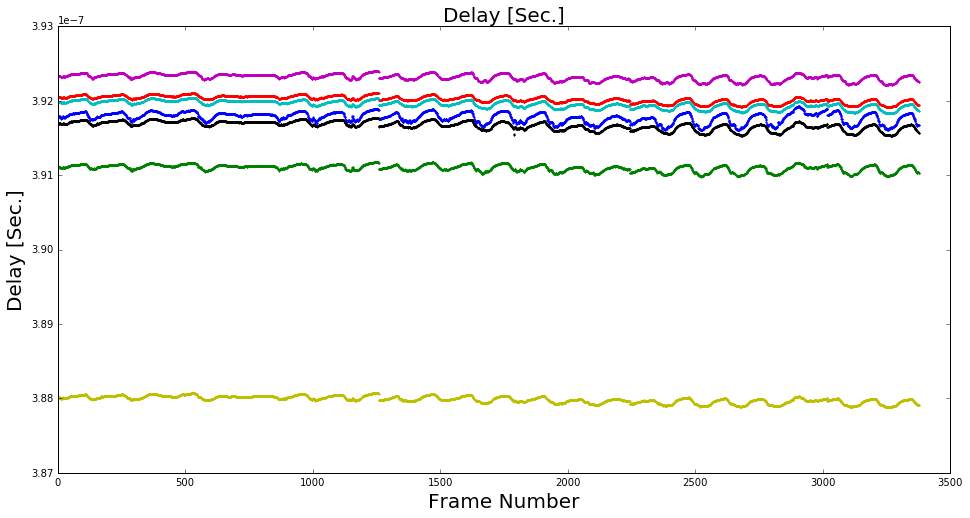

In [7]:
source_dir = ['C:/Users/sidhant/Desktop/data/20170407T194716Z_stone_corr/', 'C:/Users/sidhant/Desktop/data/20170410T180753Z_stone_corr/','C:/Users/sidhant/Desktop/data/20170414T020912Z_stone_corr/' ,'C:/Users/sidhant/Desktop/data/20170430T010748Z_stone_corr_one_file_deleted/', 'C:/Users/sidhant/Desktop/data/20170519T221539Z_stone_corr/' ,'C:/Users/sidhant/Desktop/data/20170525T174006Z_stone_corr_two_files_delated/'] #Apr 7-apr 10, #Apr 10-APR 13 #Apr 29 - May14
tot_frames = 0
corr_files=[]
for d in range(len(source_dir)):
    print(d)
    source_directory = source_dir[d]
    source_name = os.path.realpath(source_directory).split('/')[-1]
    active_dir = source_dir[d]
    all_file_names = os.listdir(active_dir)
    data_file_names = []
    for file_name in all_file_names:
        if ('.lock' not in file_name) and ('.h5' in file_name):
                data_file_names.append(file_name)
    data_file_names.sort()
    for file_name in data_file_names:
        corr_files.append(h5py.File(active_dir+file_name,'r'))

for corr_file in corr_files:
    frames = data(corr_list)
    tot_frames = tot_frames + frames

delay, unwrap_phase = delay_unwrap(tot_frames,corr_files)

figure(figsize(16,8))
plt.title('Delay [Sec.]', fontsize = 20)
plt.ylabel('Delay [Sec.]', fontsize = 20)
plt.xlabel('Frame Number', fontsize = 20)

k=1; dd=1; 

for i in range (len(corr_list)):     
    plt.plot(delay[:,i], '.', color = colors[i], label = legend_crosscorr[i], markersize = 3)

time_stamp = get_timestamp(tot_frames,corr_files)
date_stamp = [datetime.datetime.fromtimestamp(time)  for time in time_stamp]

(array([  3.90500000e-07,   3.91000000e-07,   3.91500000e-07,
          3.92000000e-07,   3.92500000e-07,   3.93000000e-07]),
 <a list of 6 Text yticklabel objects>)

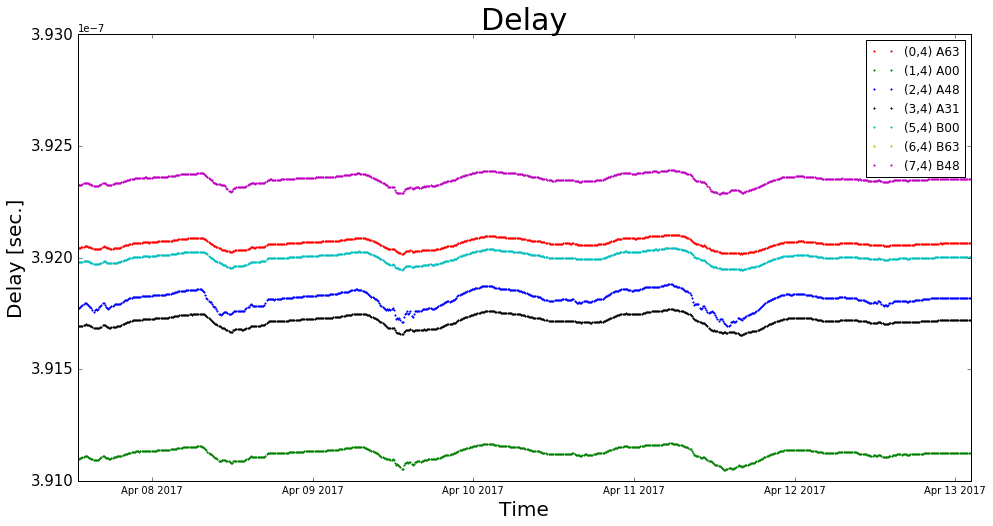

In [8]:
for i in range (len(corr_list)):     
    plt.plot(date_stamp[0:800],delay[0:800,i], '.', color = colors[i], label = legend_crosscorr[i], markersize = 3)
    
    plt.legend()
plt.ylim(3.91*10**-7,3.93*10**-7)
plt.title('Delay', size=30)
plt.xlabel('Time',size=20)
plt.ylabel('Delay [sec.]',size=20)
plt.yticks( fontsize = 15)

In [9]:
file = open("weather_interpolated.out","r")
date_temp = np.loadtxt('weather_interpolated.out')
file.close()

interp_time_800_pre = date_temp[0]
interp_temp_800 = date_temp[1]
interp_time_800 = np.array([(datetime.datetime.fromtimestamp(x))  for x in interp_time_800_pre])

In [44]:
scaled_delay =np.zeros((800,len(corr_list)))
for i in range(len(corr_list)):
    scaled_delay[:,i] = (delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i])
scaled_temp = -((interp_temp_800-np.mean(interp_temp_800))/np.std(interp_temp_800))

In [48]:
np.mean(interp_temp_800)/np.std(interp_temp_800)

1.2711620764837399

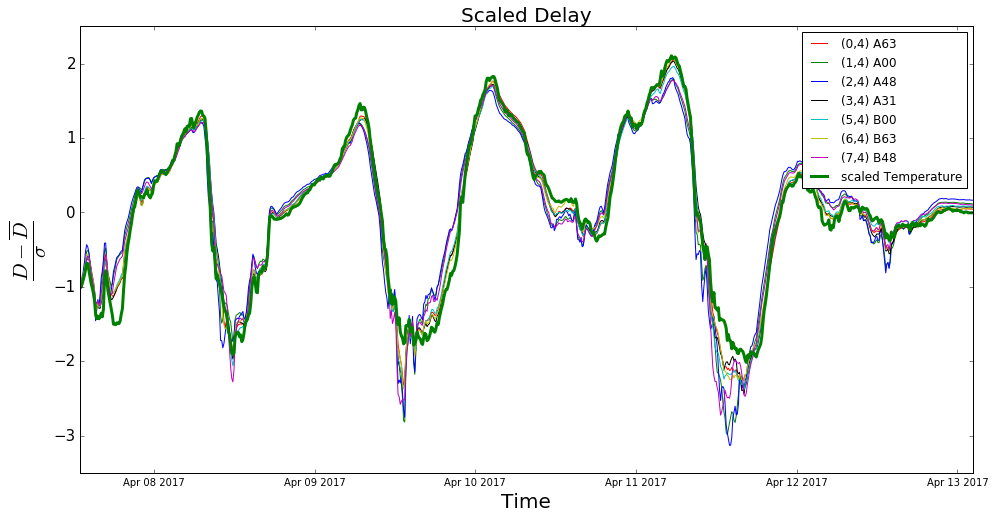

In [11]:
for i in range(len(corr_list)):
    plt.plot(date_stamp[0:800], scaled_delay[:,i], color=colors[i], label = legend_crosscorr[i])
    plt.ylim(-3.5,2.5)
    plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
    plt.xlabel('Time', size =20)
    plt.title('Scaled Delay', size=20)
    plt.legend()

plt.plot(date_stamp[0:800],scaled_temp[0:800],'g',linewidth =3,label ='scaled Temperature')

plt.yticks( fontsize = 15)
#plt.xticks( fontsize = 15)
plt.legend()

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text xticklabel objects>)

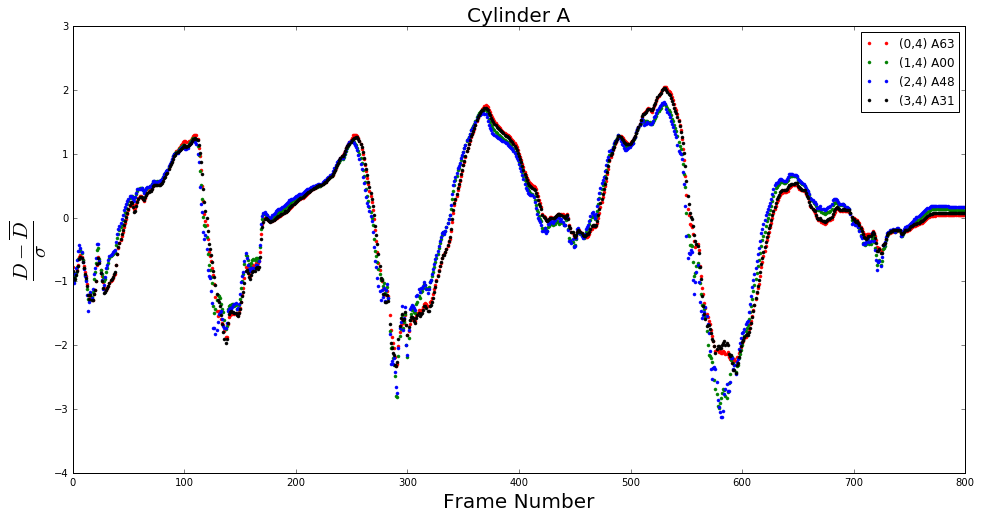

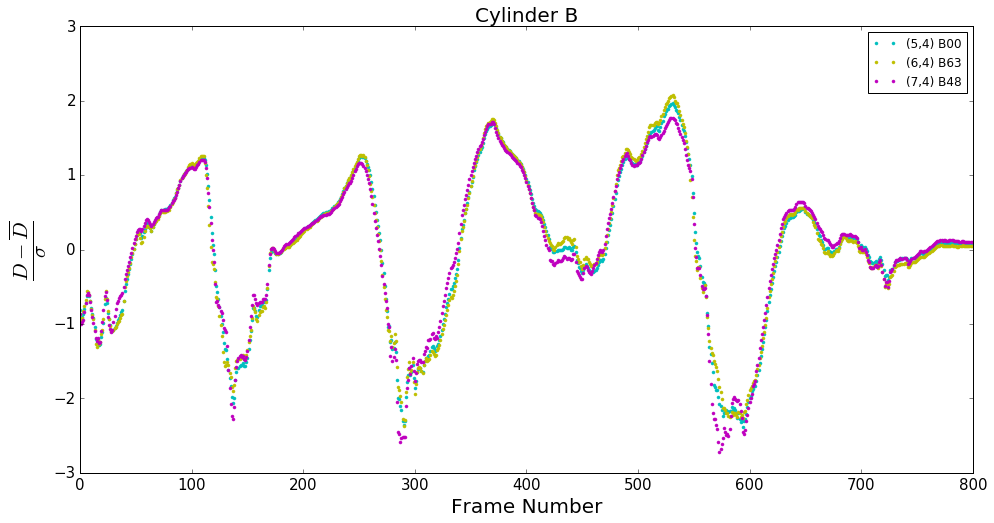

In [12]:
time_bin = np.linspace(0, 800, num=800)
cyl1 = ['r','g','b','k']
cyl2 = ['c','y','m']

for i in range(len(corr_list)):
    if colors[i] in cyl1:
        plt.figure(1)
        plt.plot((delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i]),'.', color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()
        plt.title('Cylinder A', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        #plt.ylim(1,2.5)
        #plt.fill_between(time_bin, np.mean(delay[0:800,0:3], axis=1)*(1.+10),y2=np.mean(delay[0:800,0:3], axis=1)*(1.-10), color='k', alpha=0.2)
    else:
        plt.figure(2)
        plt.plot((delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i]),'.', color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()
        plt.title('Cylinder B', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
plt.yticks( fontsize = 15)
plt.xticks( fontsize = 15)

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text xticklabel objects>)

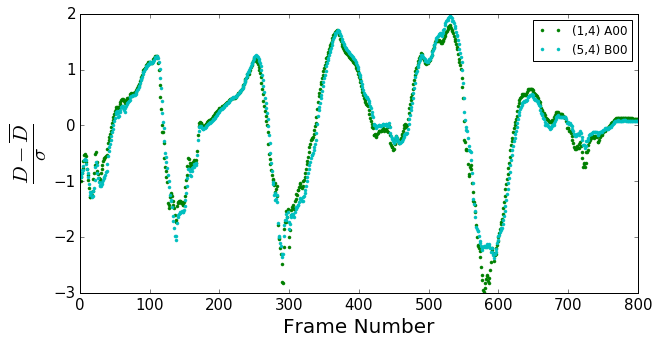

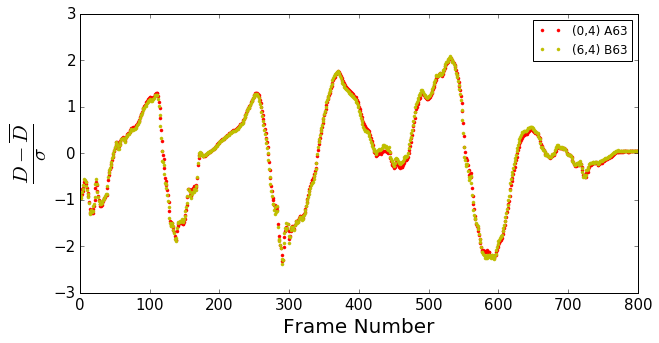

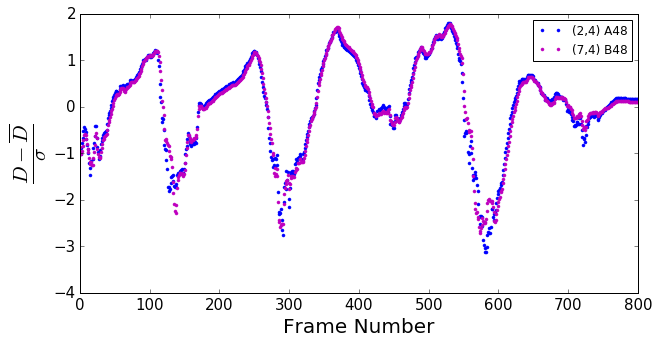

In [13]:
pos1=['g','c']
pos2=['r','y']
pos3=['b','m']
figure(figsize(10,5))
for i in range(len(corr_list)):
    if colors[i] in pos1:
        plt.figure(1)
        plt.plot((delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i]),'.', color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        plt.yticks( fontsize = 15)
        plt.xticks( fontsize = 15)
        #plt.ylim(1,2.5)
        #plt.fill_between(time_bin, np.mean(delay[0:800,0:3], axis=1)*(1.+10),y2=np.mean(delay[0:800,0:3], axis=1)*(1.-10), color='k', alpha=0.2)
    if colors[i] in pos2:
        plt.figure(2)
        plt.plot((delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i]),'.', color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()

        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        plt.yticks( fontsize = 15)
        plt.xticks( fontsize = 15)
    if colors[i] in pos3:
        plt.figure(3)
        plt.plot((delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i]),'.', color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()

        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        plt.yticks( fontsize = 15)
        plt.xticks( fontsize = 15)
        
plt.yticks( fontsize = 15)
plt.xticks( fontsize = 15)

In [14]:
print(legend_crosscorr)
print(colors)

['(0,4) A63', '(1,4) A00', '(2,4) A48', '(3,4) A31', '(5,4) B00', '(6,4) B63', '(7,4) B48']
['r', 'g', 'b', 'k', 'c', 'y', 'm']


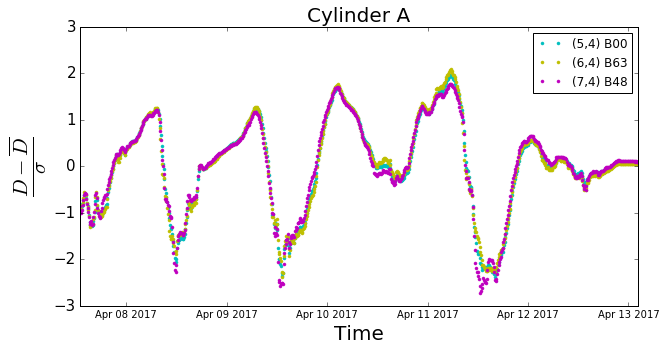

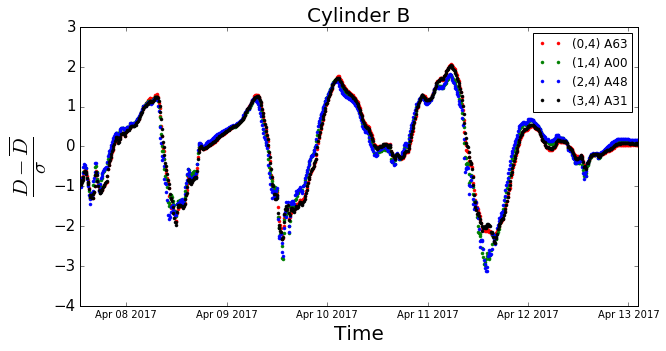

In [15]:
#legend_crosscorr_meil = ["B48","A48","B63","B00","A31","A00","A63"]
cyl2=['r','g','b','k']
cyl1=['c','y','m']

for i in range(len(corr_list)):
    if colors[i] in cyl1:
        plt.figure(1)
        plt.plot(date_stamp[0:800], scaled_delay[:,i],'.', color=colors[i], label = legend_crosscorr[i])
        plt.legend()
        plt.title('Cylinder A', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Time', size =20)
        plt.yticks( fontsize = 15)
        
    else:
        plt.figure(2)

        plt.plot(date_stamp[0:800],scaled_delay[:,i],'.', color=colors[i], label = legend_crosscorr[i])
        plt.legend()
        plt.title('Cylinder B', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Time', size =20)
        plt.yticks( fontsize = 15)

In [16]:
frac_delay = np.zeros((800,len(corr_list)))
for i in range(7):
    frac_delay[:,i] = (delay[0:800,i]-np.mean(delay[0:800,i]))/np.std(delay[0:800,i])

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 6 Text yticklabel objects>)

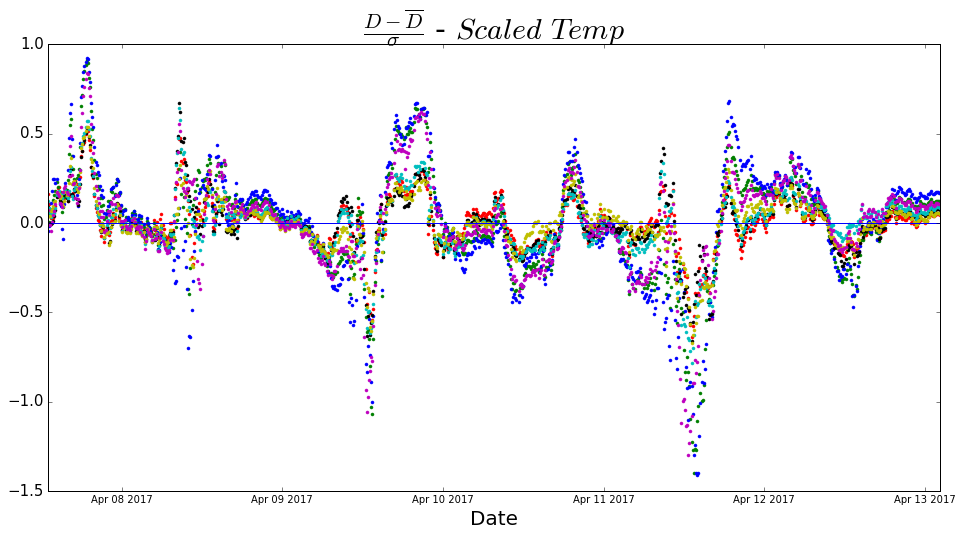

In [20]:

for i in range(len(corr_list)):
    plt.figure(1)
    
    plt.plot(date_stamp[0:800],frac_delay[:,i]-scaled_temp[0:800],'.', color=colors[i], label = legend_crosscorr[i])
    
plt.title(r'$\frac{D- \overline{D}}{\sigma}$ - $Scaled$ $Temp$', size=30)
plt.xlabel('Date', size =20)
plt.axhline(y=0)
plt.yticks( fontsize = 15)
#plt.xticks( fontsize = 15)

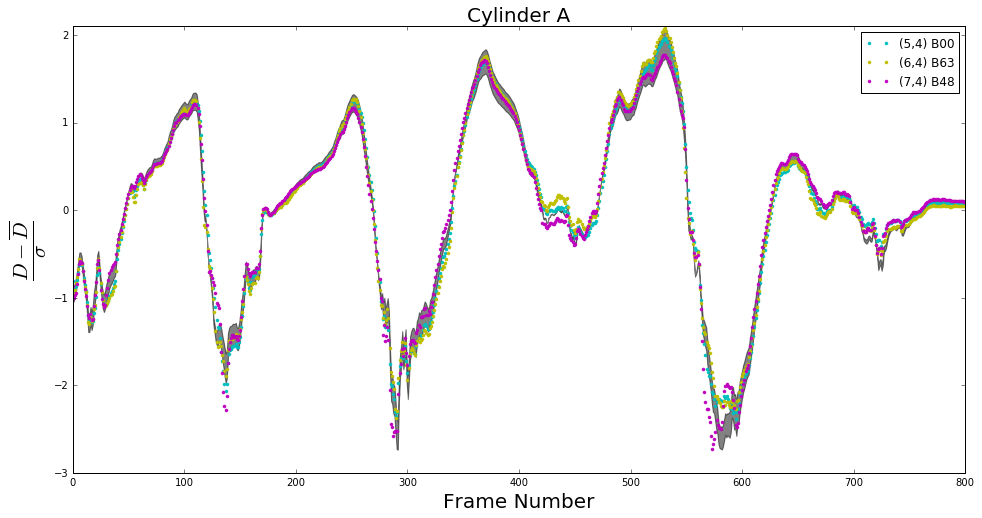

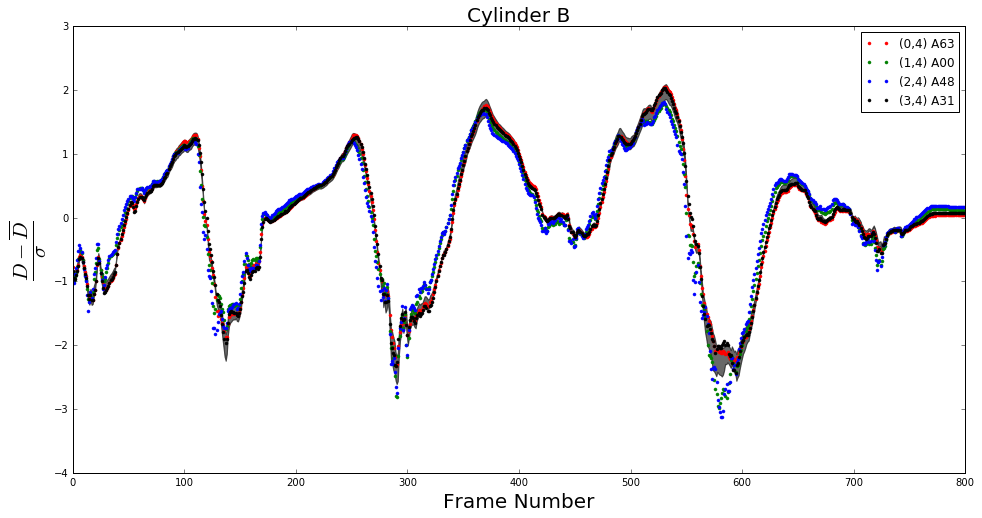

In [21]:
for i in range(len(corr_list)):
    if colors[i] in cyl1:
        plt.figure(1)
        plt.plot(frac_delay[:,i], '.' , color=colors[i], label = legend_crosscorr[i])
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()
        plt.title('Cylinder A', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        plt.ylim(-3,2.1)
        #plt.plot(np.mean(frac_delay[:,0:3], axis=1))
        plt.fill_between(time_bin, np.mean(frac_delay[:,0:4], axis=1)*(1.+0.08),y2=np.mean(frac_delay[:,0:3], axis=1)*(1.-0.08), color='k', alpha=0.2)
    else:
        plt.figure(2)
        plt.plot(frac_delay[:,i],'.', color=colors[i], label = legend_crosscorr[i])
        plt.fill_between(time_bin, np.mean(frac_delay[:,4:7], axis=1)*(1.+0.08),y2=np.mean(frac_delay[:,4:6], axis=1)*(1.-0.08), color='k', alpha=0.2)
        #plt.ylim(-3.5,2.5)
        plt.xlim(0,800)
        plt.legend()
        plt.title('Cylinder B', size=20)
        plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)

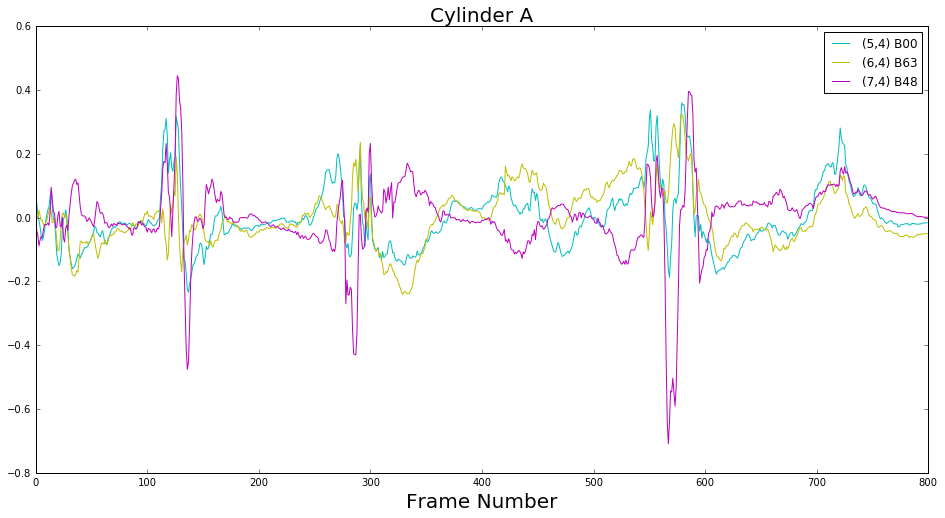

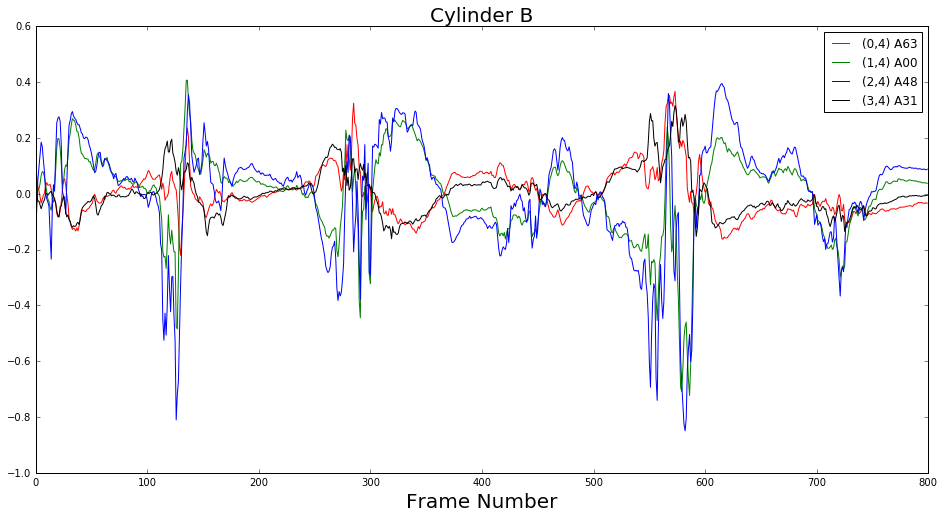

In [22]:
for i in range(len(corr_list)):
    if colors[i] in cyl1:
        plt.figure(1)
        plt.plot(frac_delay[:,i]-np.mean(frac_delay[:,0:4], axis=1) , color=colors[i], label = legend_crosscorr[i])
        plt.xlim(0,800)
        plt.legend()
        plt.title('Cylinder A', size=20)
        #plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)
        
    else:
        plt.figure(2)
        plt.plot(frac_delay[:,i]-np.mean(frac_delay[:,4:7], axis=1), color=colors[i], label = legend_crosscorr[i])
        plt.legend()
        plt.title('Cylinder B', size=20)
        #plt.ylabel(r'$\frac{D- \overline{D}}{\sigma}$', size=30)
        plt.xlabel('Frame Number', size =20)

In [24]:
del_d = np.zeros((800,len(corr_list)))
for i in range(7):
    del_d[:,i] = (delay[0:800,i]-np.mean(delay[0:800,i]))    

(array([-150., -100.,  -50.,    0.,   50.,  100.]),
 <a list of 6 Text yticklabel objects>)

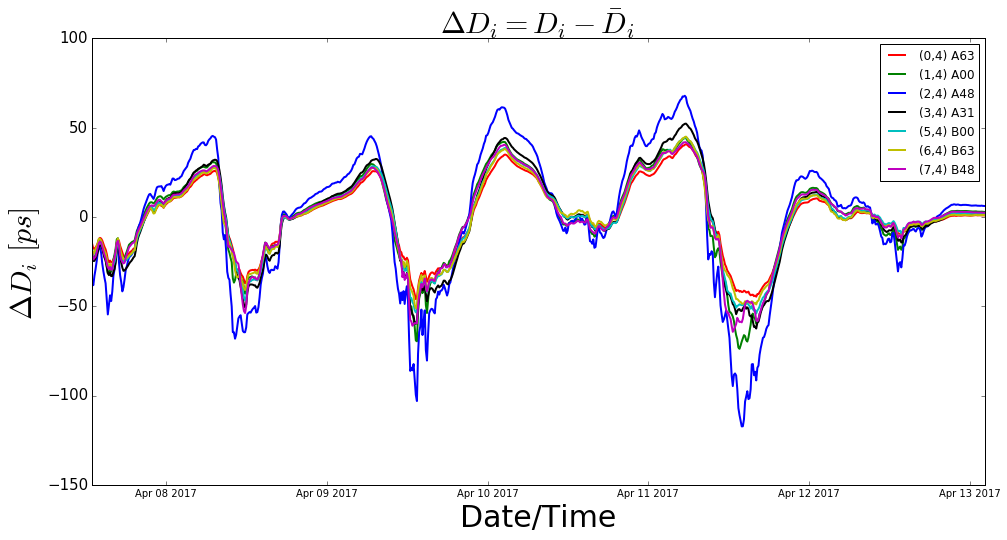

In [25]:
figure(figsize(16,8))
for i in range(len(corr_list)):
    plt.plot(date_stamp[0:800],del_d[:,i]/10**-12, color = colors[i],linewidth =2, label=legend_crosscorr[i])
    plt.legend()
    
plt.title( r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=30)
plt.xlabel('Date/Time', size =30)
plt.ylabel(r'$\Delta D_i $ $[ps]$ ', size=30)
plt.yticks( fontsize = 15)

In [26]:
residual_new = np.zeros((800,len(corr_list)))
for i in range(len(corr_list)):
    residual_new[:,i] = delay[0:800,i]- np.mean(delay[0:800,:], axis=1)

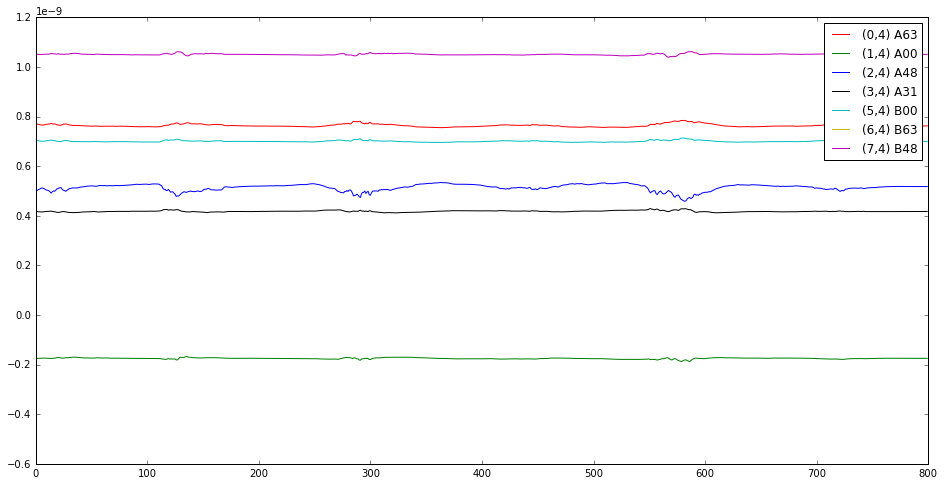

In [27]:
for i in range(len(corr_list)):
    plt.plot(residual_new[:,i], color=colors[i], label=legend_crosscorr[i])
    plt.legend()
    plt.ylim(-0.6*10**-9,1.2*10**-9)

In [28]:
x=numpy.arange(0, 800, 1)
residual_63 = np.zeros((800,len(corr_list)-1))
for i in range(len(corr_list)):
    if i!=0:
        z=np.polyfit(del_d[:,i], del_d[:,0],1)
        p=np.poly1d(z)
        print (p[0],p[1])
        residual_63[:,i-1] = del_d[:,0]- p(del_d[:,i])
        
        

5.97261138958e-23 0.785831138339
3.01975495065e-23 0.512457641891
6.4860483278e-23 0.769119735127
5.74724017391e-23 0.871486809676
3.49005514361e-23 0.914583481787
4.67960572886e-23 0.825840561805


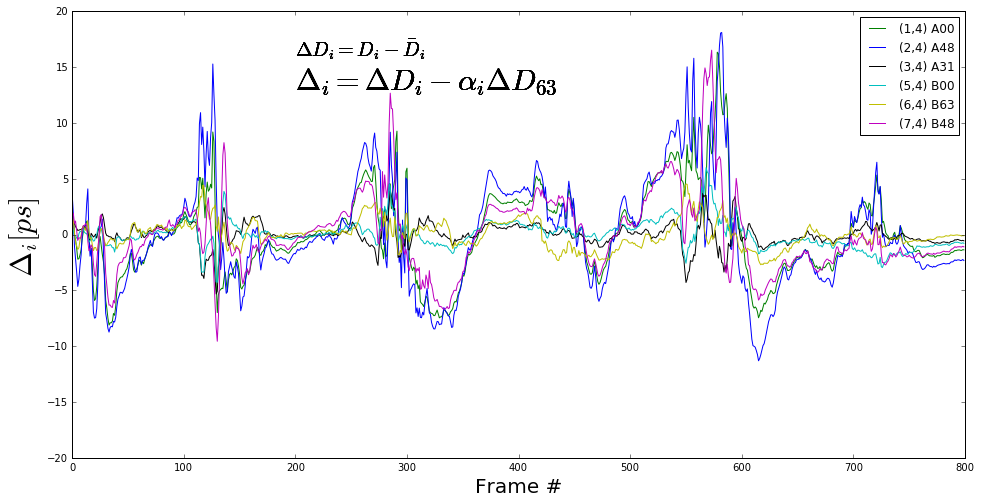

In [29]:
for i in range(len(corr_list)-1):
    plt.plot(residual_63[:,i]/10**-12, color=colors[i+1], label=legend_crosscorr[i+1])
    plt.legend()
    plt.text(200, 16, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
    plt.text(200, 13, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{63} $ ' , fontsize=30)
    plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
    plt.xlabel('Frame #', size=20)
    plt.ylim(-20,20)



In [27]:
colors_31=['r','g','b','c','y','m']
legend_crosscorr_31 = ["(0,4) A63","(1,4) A00","(2,4) A48","(5,4) B00","(6,4) B63","(7,4) B48"]
for i in range(len(corr_list)-1):
    plt.plot(residual_31[:,i]/10**-12, color=colors_31[i], label=legend_crosscorr_31[i])
    plt.legend(fontsize=20)
    plt.text(200, 25, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
    plt.text(200, 20, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{31} $ ' , fontsize=30)
    plt.ylabel(r'$\Delta_i [ps]$', size=30)
    plt.xlabel('Frame #', size=20)

NameError: name 'residual_31' is not defined

In [30]:
x=numpy.arange(0, 800, 1)
residual1_31 = np.zeros((800,len(corr_list)-1))
k=0
for i in range(len(corr_list)):
    if i!=3:
        z=np.polyfit(frac_delay[:,i], frac_delay[:,3],1)
        p=np.poly1d(z)
        print (p[0],p[1])
        residual1_31[:,k] = frac_delay[:,3]- p(frac_delay[:,i])
        k=k+1

-3.27295193567e-12 0.998648644297
-2.60572544443e-13 0.979310575035
-1.74883178418e-12 0.967533912992
-3.7393321996e-13 0.998589438565
-1.51268987839e-12 0.996657237081
-9.14170633144e-13 0.98718139566


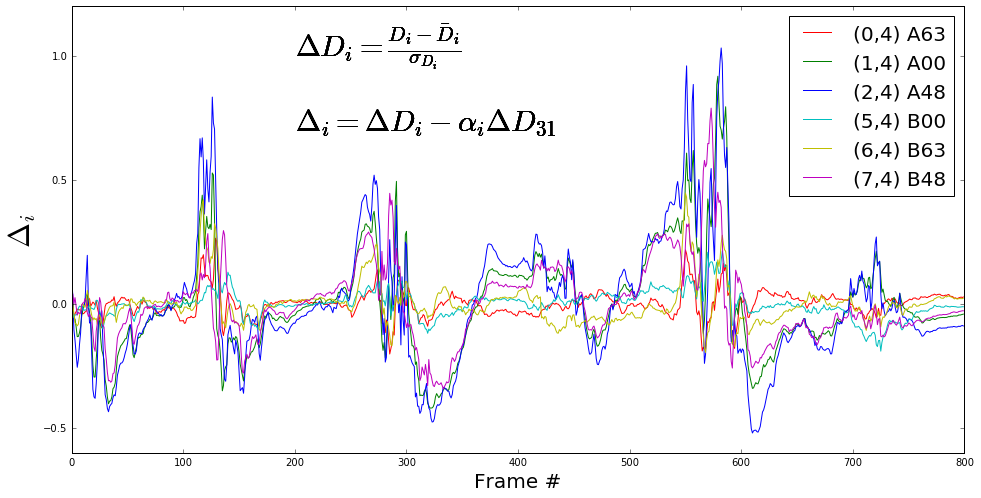

In [31]:
colors_31=['r','g','b','c','y','m']
legend_crosscorr_31 = ["(0,4) A63","(1,4) A00","(2,4) A48","(5,4) B00","(6,4) B63","(7,4) B48"]
for i in range(len(corr_list)-1):
    plt.plot(residual1_31[:,i], color=colors_31[i], label=legend_crosscorr_31[i])
    plt.legend(fontsize=20)
    plt.text(200,1, r'$\Delta D_i =  \frac{D_i - \bar D_i}{\sigma_{D_{i}}} $ ' , fontsize=30)
    plt.text(200, 0.7, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{31} $ ' , fontsize=30)
    plt.ylabel(r'$\Delta_i $', size=30)
    plt.xlabel('Frame #', size=20)

In [33]:
x=numpy.arange(0, 800, 1)
residual1_63 = np.zeros((800,len(corr_list)-1))
for i in range(len(corr_list)):
    if i!=0:
        z=np.polyfit(frac_delay[:,i], frac_delay[:,0],1)
        p=np.poly1d(z)
        print (p[0],p[1])
        residual1_63[:,i-1] = frac_delay[:,0]- p(frac_delay[:,i])

3.01652443532e-12 0.980678822257
1.52518781437e-12 0.969605006918
3.27602931689e-12 0.998648644297
2.90259852652e-12 0.998134236422
1.76246018672e-12 0.998120532983
2.36330316881e-12 0.984975796242


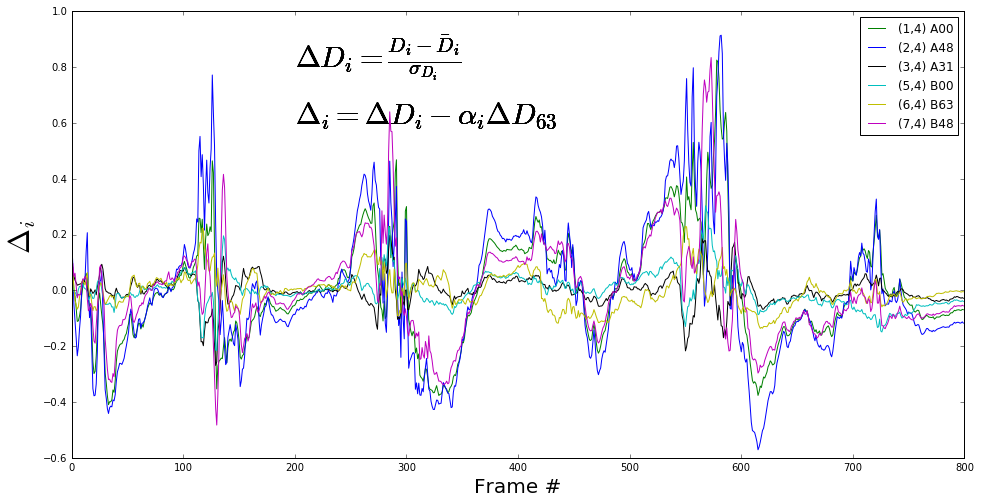

In [34]:
for i in range(len(corr_list)-1):
    plt.plot(residual1_63[:,i], color=colors[i+1], label=legend_crosscorr[i+1])
    plt.legend()
    plt.text(200,0.8, r'$\Delta D_i =  \frac{D_i - \bar D_i}{\sigma_{D_{i}}} $ ' , fontsize=30)
    plt.text(200, 0.6, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{63} $ ' , fontsize=30)
    plt.ylabel(r'$\Delta_i $ ', size=30)
    plt.xlabel('Frame #', size=20)


1.51751925446e-09 5.46781304906e-12
1.82810285672e-09 6.58688489493e-12
2.74200822237e-09 9.87980106009e-12
1.96617799056e-09 7.08438699671e-12
1.72978962745e-09 6.2326499445e-12
1.6548091386e-09 5.96248579722e-12
1.7601781825e-09 6.34214373665e-12


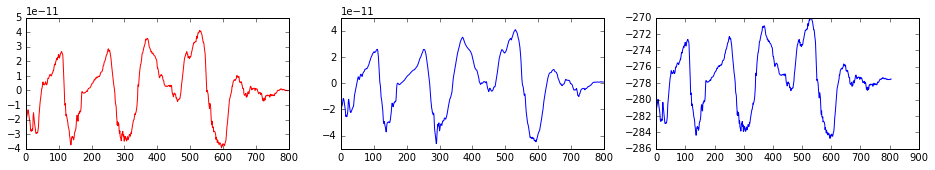

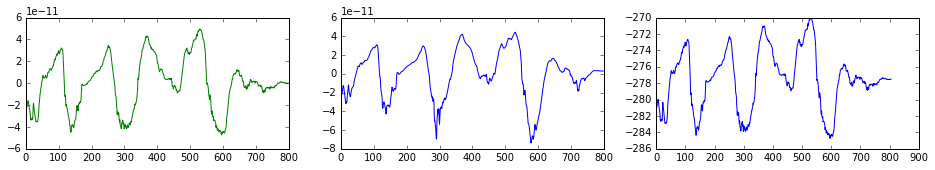

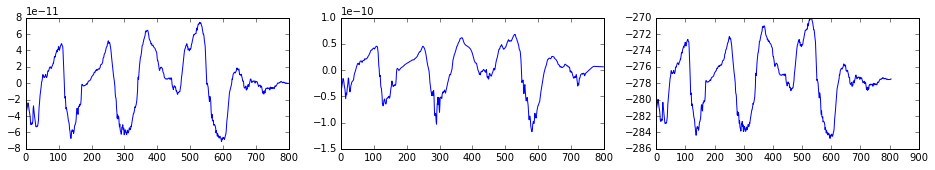

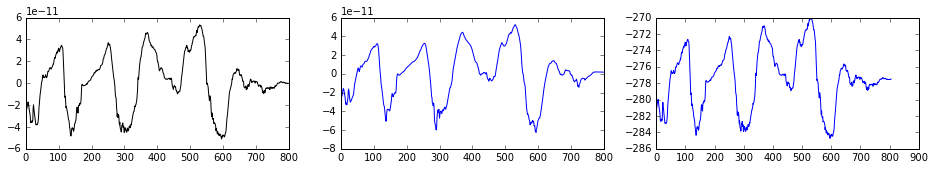

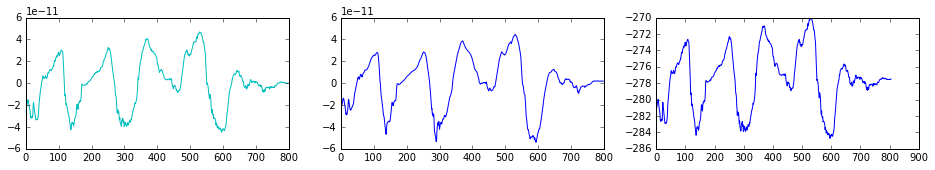

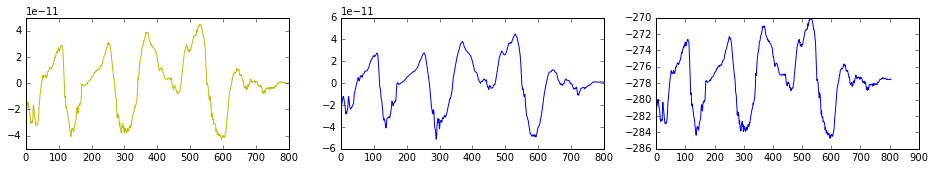

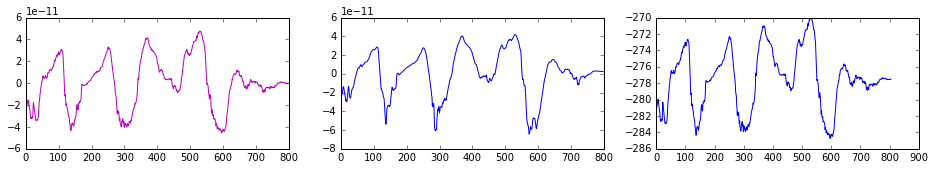

In [35]:
x=numpy.arange(0, 800, 1)
residual_t = np.zeros((800,len(corr_list)))

del_t = -(interp_temp_800+273)

for i in range(len(corr_list)):
    z=np.polyfit(del_t[0:800],del_d[:,i],1)
    p=np.poly1d(z)
    print (p[0],p[1])
    
    residual_t[:,i] = del_d[:,i] - p(del_t[0:800])
    plt.figure(i+1)
    
    plt.subplot(3,3,1)
    plt.plot(p(del_t[0:800]), color=colors[i], label=legend_crosscorr[i])
    
    plt.subplot(3,3,2)
    plt.plot(del_d[:,i])
    
    plt.subplot(3,3,3)
    plt.plot(del_t)

(array([-60., -40., -20.,   0.,  20.,  40.]),
 <a list of 6 Text yticklabel objects>)

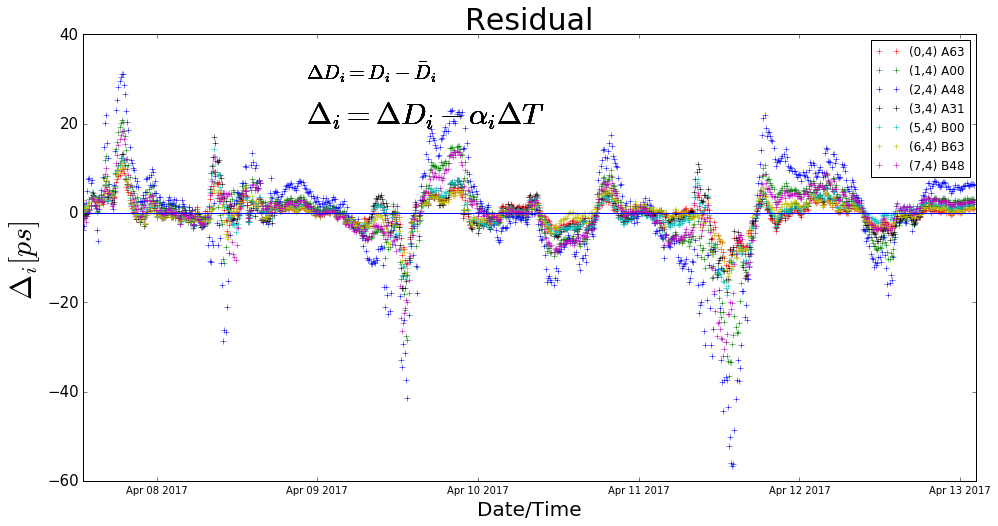

In [37]:
for i in range(len(corr_list)):
    plt.plot(date_stamp[0:800],residual_t[:,i]/10**-12,'+', color=colors[i], label=legend_crosscorr[i])
    plt.legend()
    plt.text(date_stamp[200], 30, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
    plt.text(date_stamp[200], 20, r'$\Delta_i = \Delta D_i - \alpha_i \Delta T $ ' , fontsize=30)
    plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
    plt.xlabel('Date/Time', size=20)
    plt.title('Residual', size=30)
    plt.axhline(y=0)
plt.yticks( fontsize = 15)


In [34]:
len(corr_list)

7

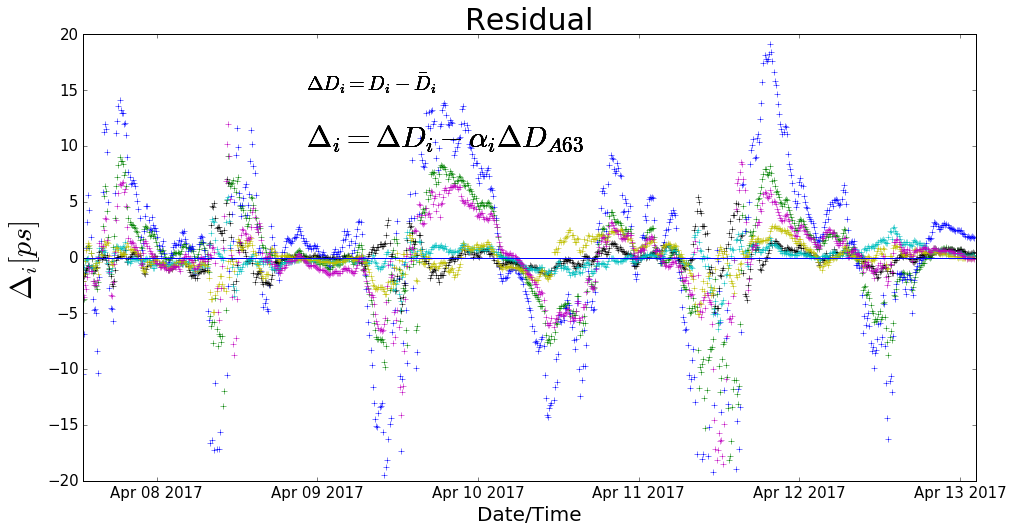

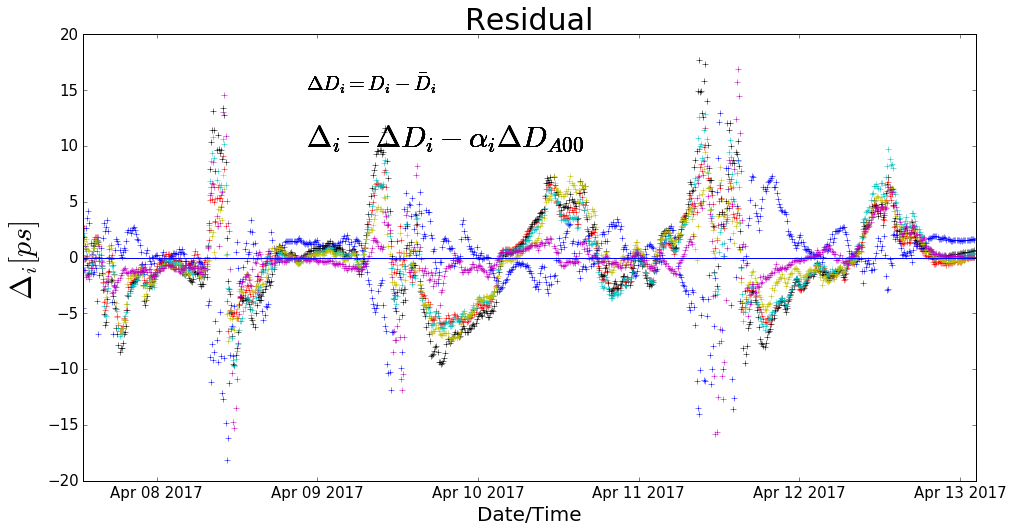

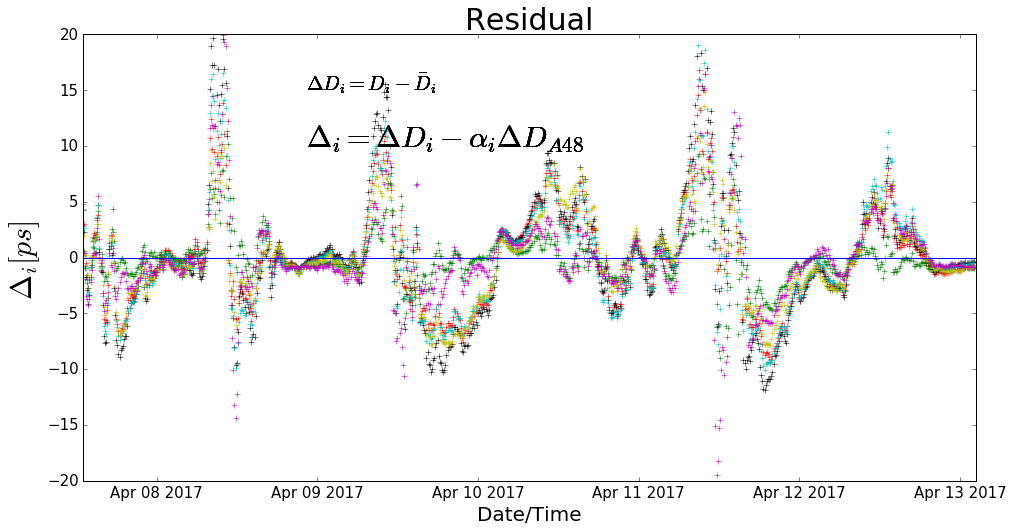

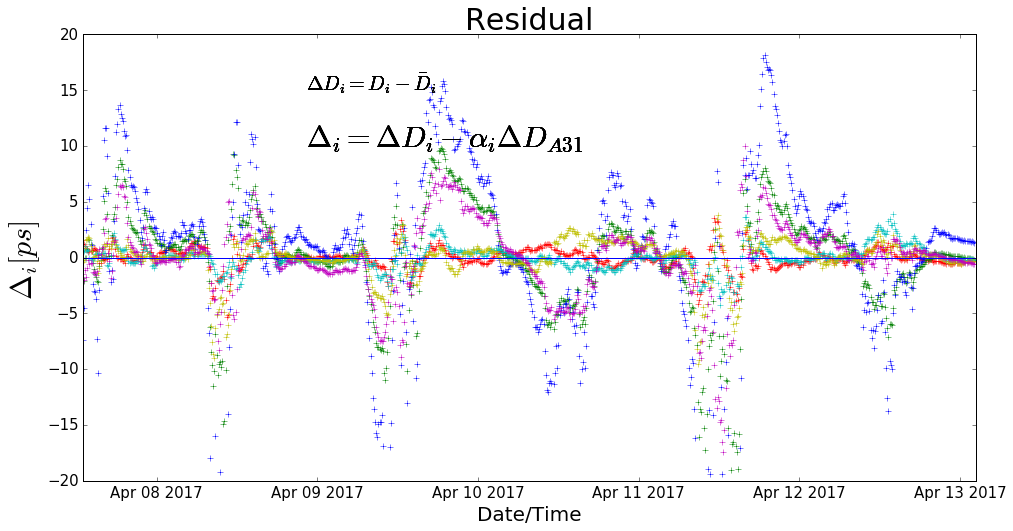

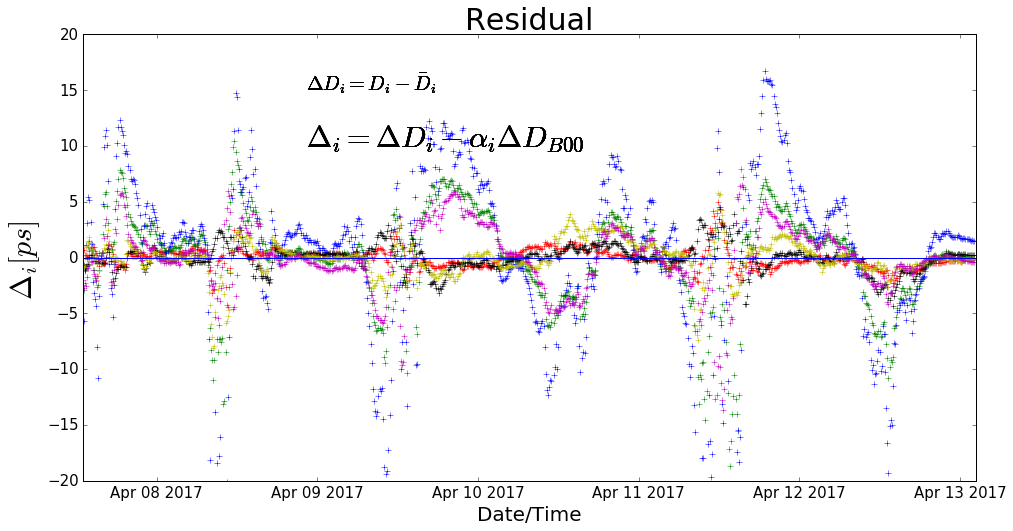

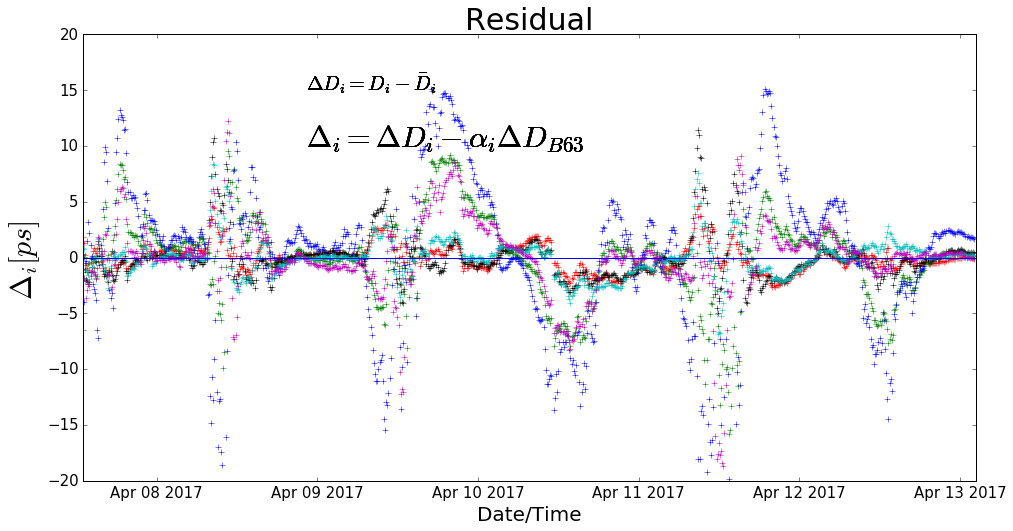

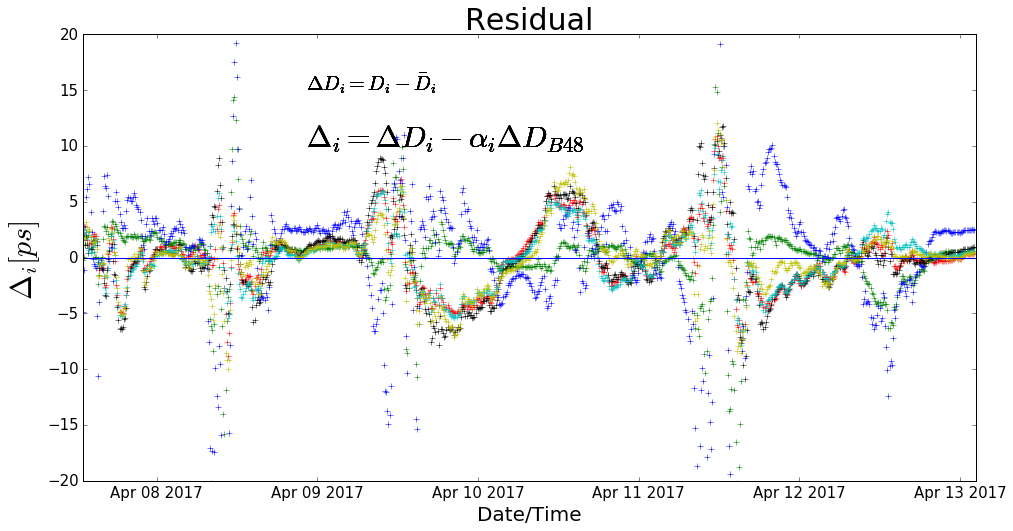

In [41]:


legend_all = ["A63","A00","A48","A31","B00","B63","B48"]

for k in range(len(legend_all)):
    residual_all = np.zeros((800,len(corr_list)-1))
    kkk=0
    #print(k)
    for i in range(len(corr_list)):
        if i!=k:
            z=np.polyfit(del_d[:,k], del_d[:,i],2)
            p=np.poly1d(z)
            #print (p[0],p[1])
            residual_all[:,kkk] = del_d[:,i]- p(del_d[:,k])
            #print (kkk)
            kkk=kkk+1
            
    plt.figure()
    kk=0
    for i in range(len(corr_list)):
        if i!=k:
            plt.plot(date_stamp[0:800],residual_all[:,kk]/10**-12,'+', color=colors[i], label=legend_crosscorr[i])
            plt.text(date_stamp[200], 15, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
            plt.text(date_stamp[200], 10, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{%s} $ '%(str(legend_all[k])) , fontsize=30)
            plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
            plt.xlabel('Date/Time', size=20)
            kk=kk+1
            #plt.legend(fontsize=20)
            plt.yticks( fontsize = 15)
            plt.xticks( fontsize = 15)
            plt.title('Residual', size=30)
            plt.axhline(y=0)
            plt.ylim(-20,20)
    #plt.ylim(-40,30)
             

In [67]:
print(legend_crosscorr)
print(colors)

['(0,4) A63', '(1,4) A00', '(2,4) A48', '(3,4) A31', '(5,4) B00', '(6,4) B63', '(7,4) B48']
['r', 'g', 'b', 'k', 'c', 'y', 'm']


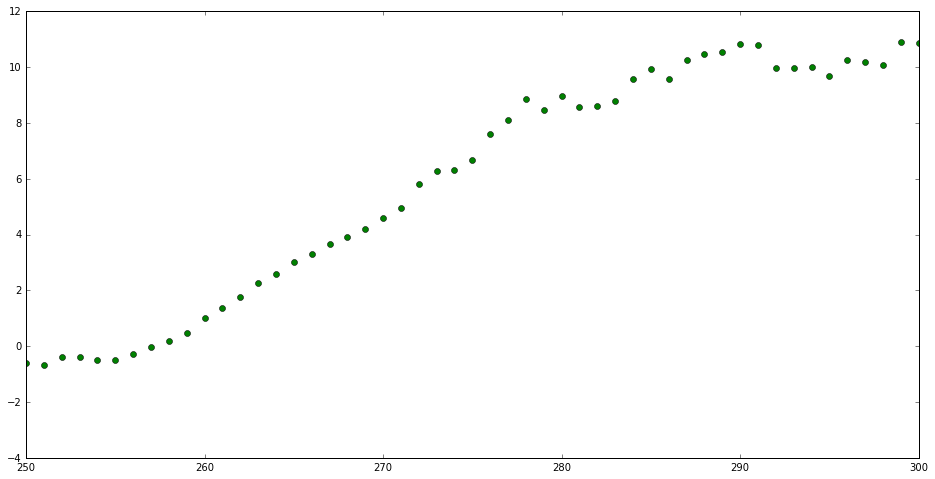

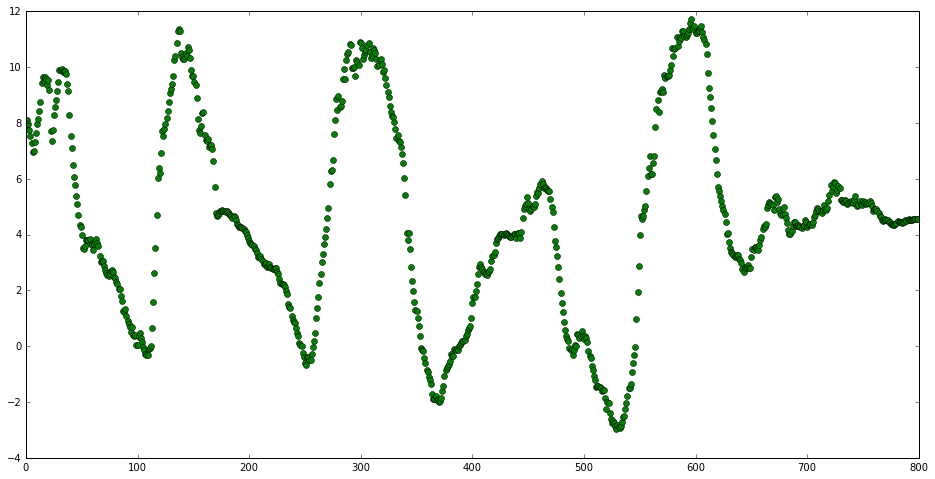

In [36]:
plt.figure()
plt.plot(interp_temp_800[0:800],'og',linewidth =4)
plt.xlim(250,300)


plt.figure()
plt.plot(interp_temp_800[0:800],'og',linewidth =4)


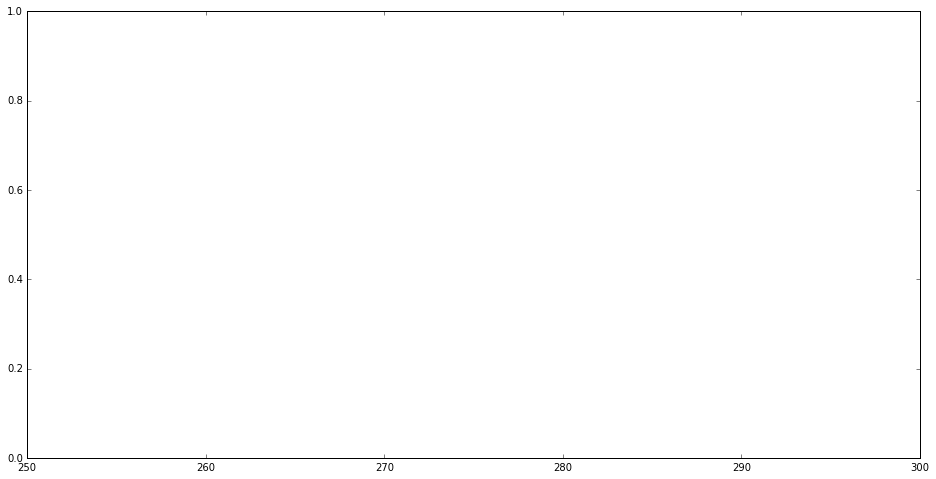

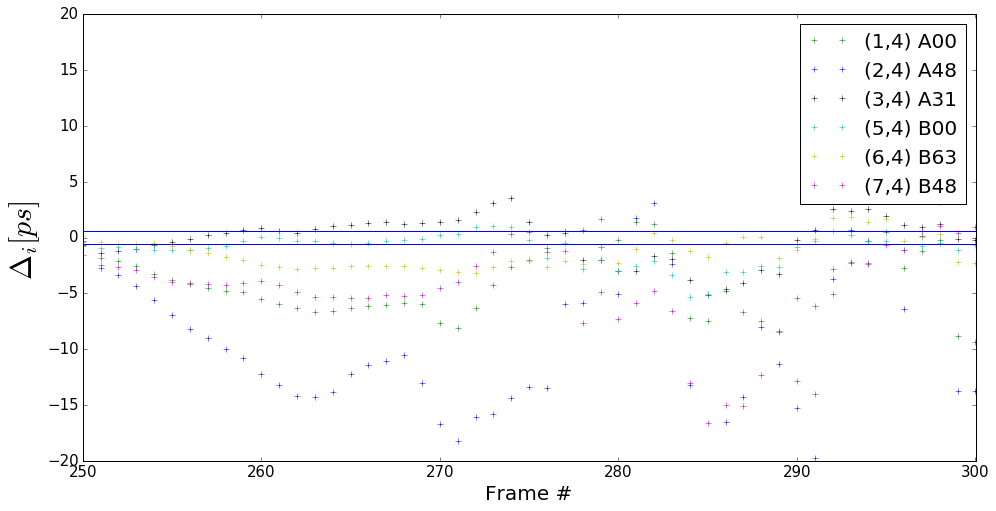

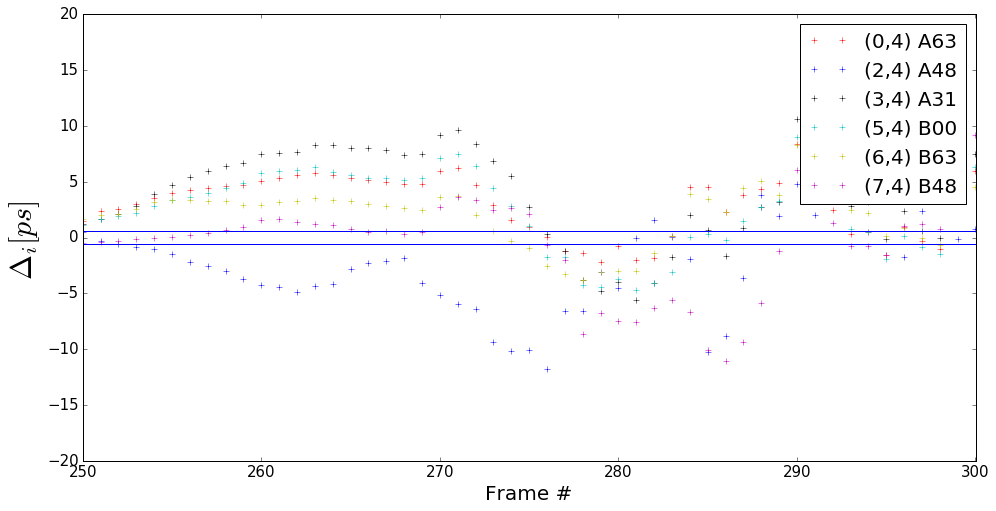

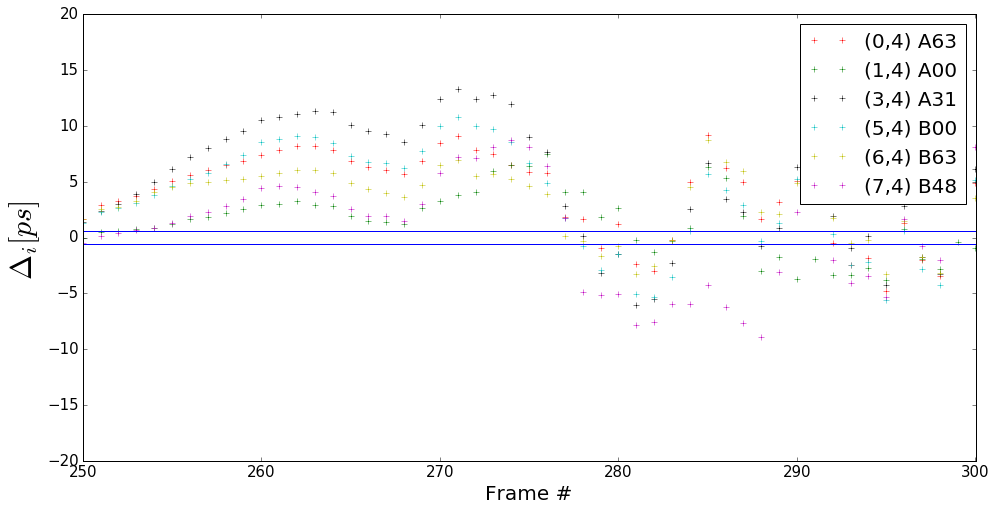

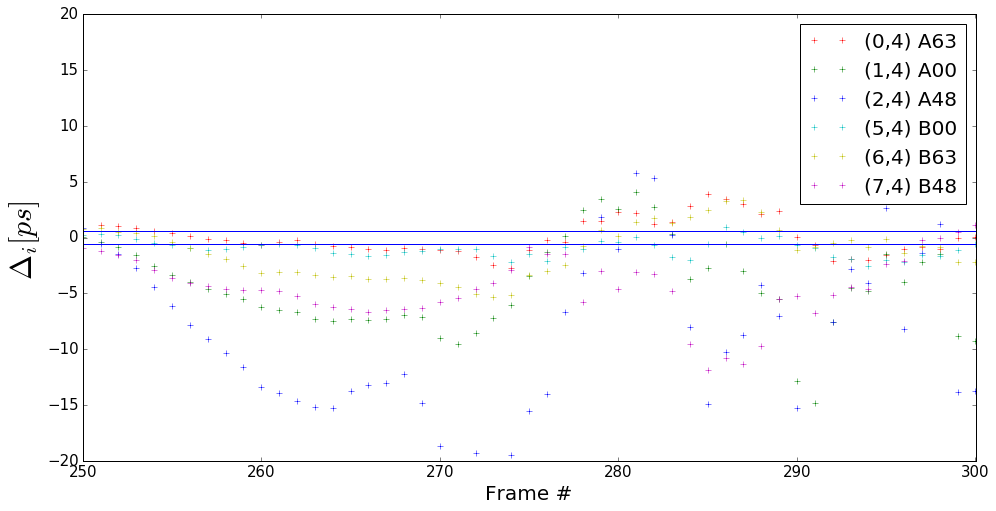

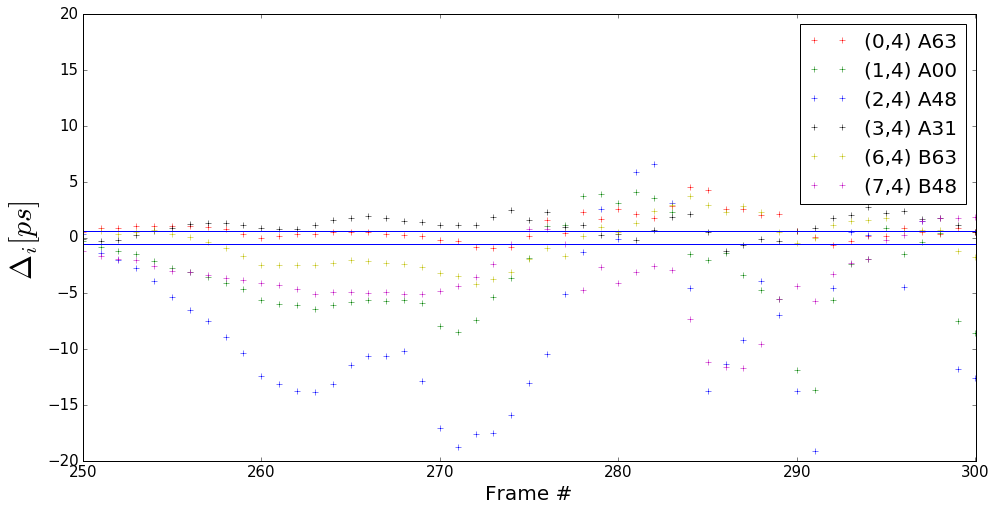

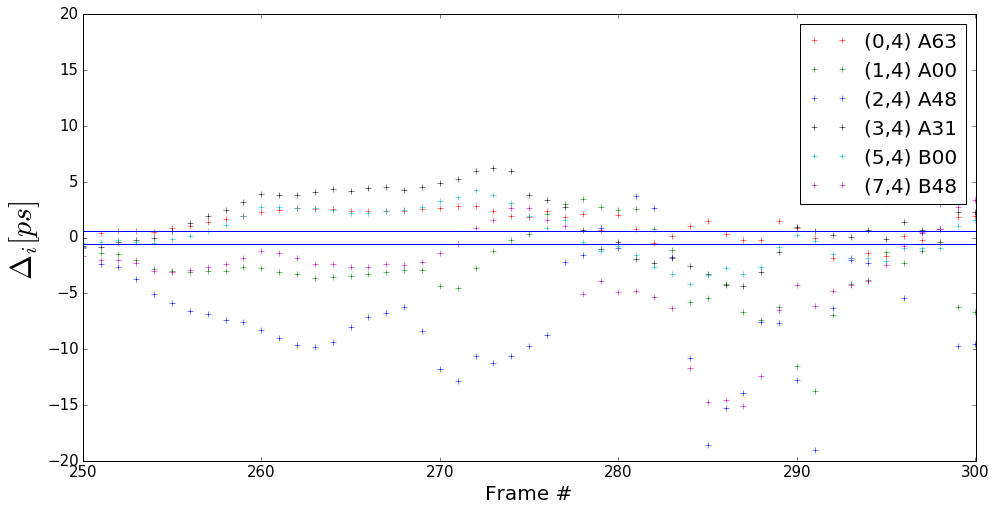

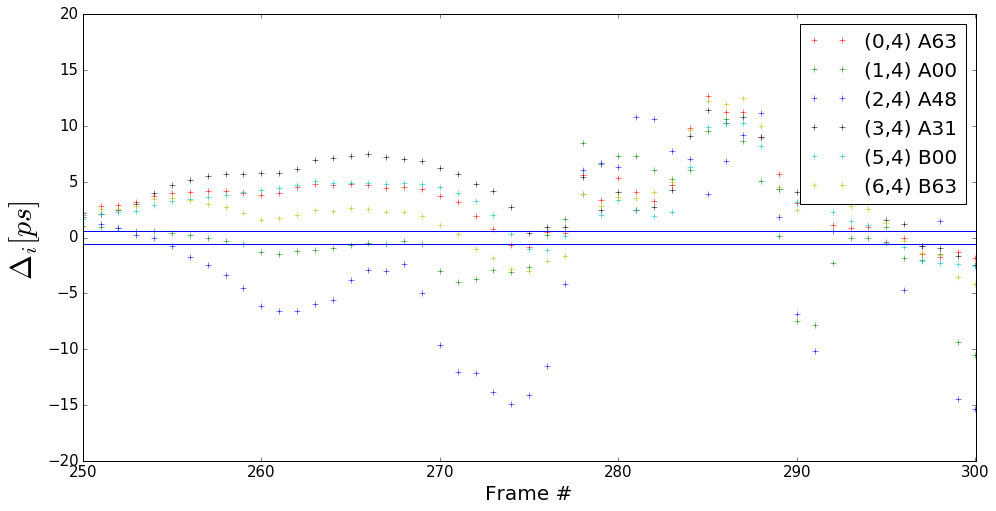

In [37]:
legend_all = ["A63","A00","A48","A31","B00","B63","B48"]
figure(figsize(16,8))
for k in range(len(legend_all)):
    residual_all = np.zeros((800,len(corr_list)-1))
    kkk=0

    for i in range(len(corr_list)):
        if i!=k:
            z=np.polyfit(del_d[:,k], del_d[:,i],1)
            p=np.poly1d(z)
            residual_all[:,kkk] = del_d[:,i]- p(del_d[:,k])
            kkk=kkk+1
    plt.xlim(250,300)       
    plt.figure()
    kk=0
    mm=[]
    mm = interp_time_800[0].hour
    for i in range(len(corr_list)):
        if i!=k:
            plt.plot(residual_all[:,kk]/10**-12,'+', color=colors[i], label=legend_crosscorr[i])
            #plt.text(200, 15, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
            #plt.text(200, 10, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{%s} $ '%(str(legend_all[k])) , fontsize=30)
            plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
            plt.xlabel('Frame #', size=20)
            kk=kk+1
            plt.legend(fontsize=20)
            plt.yticks( fontsize = 15)
            plt.xticks( fontsize = 15)
            plt.axhline(y=0.6)
            plt.axhline(y=-0.6)

    plt.ylim(-20,20)
    plt.xlim(250,300)

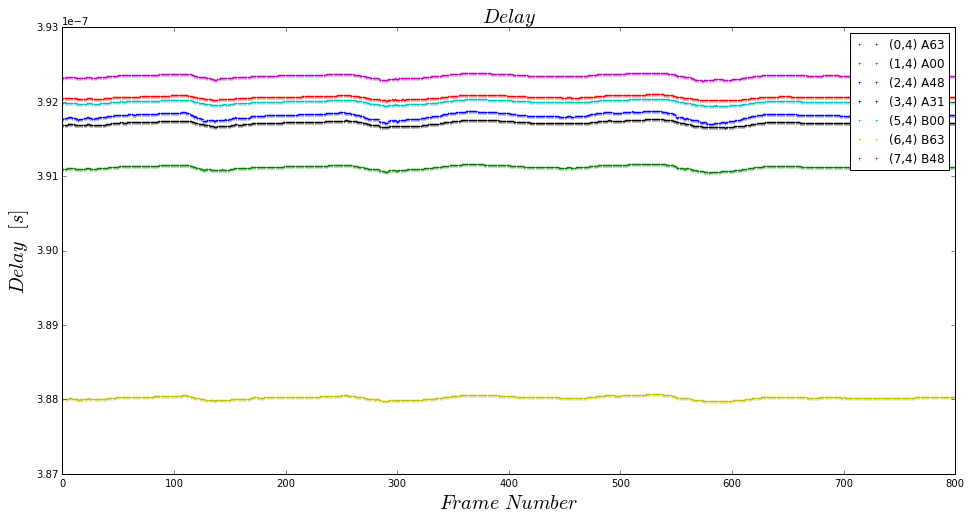

In [38]:
for i in range (len(corr_list)):  
    plt.plot(delay[0:800,i], '+' ,color = colors[i], label = legend_crosscorr[i], markersize = 3)
    plt.title('$Delay$', size=20)
    plt.xlabel('$Frame$ $Number$', size=20)
    plt.ylabel('$Delay$  $[s]$', size=20)
    plt.legend()

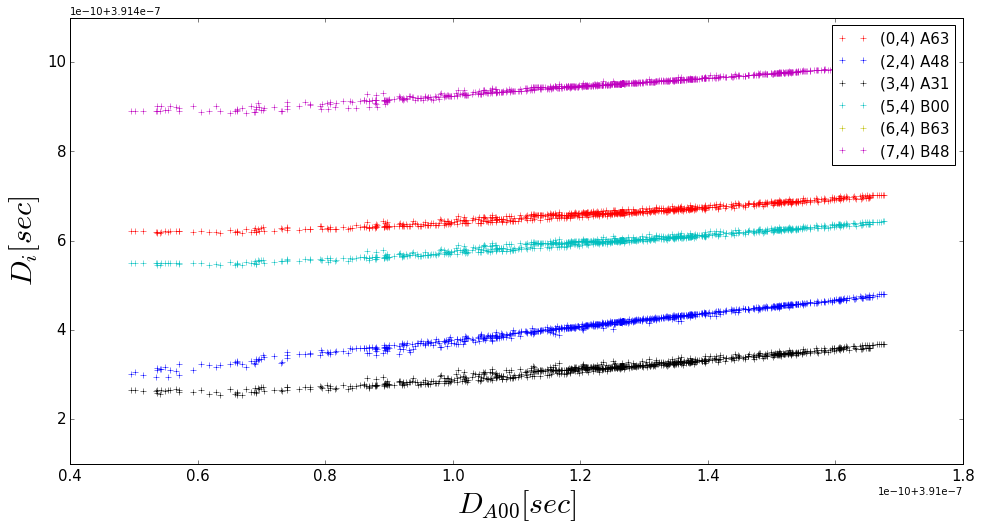

In [39]:
plt.figure(figsize(16,8))
for i in range(len(corr_list)):
    if i!=1:
        plt.plot(delay[0:800,1],delay[0:800,i], '+', color= colors[i], label=legend_crosscorr[i])
        plt.legend(fontsize=15)
    plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel('$D_{A00} [sec]$', size=30)
    plt.ylabel('$D_i [sec]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)
    

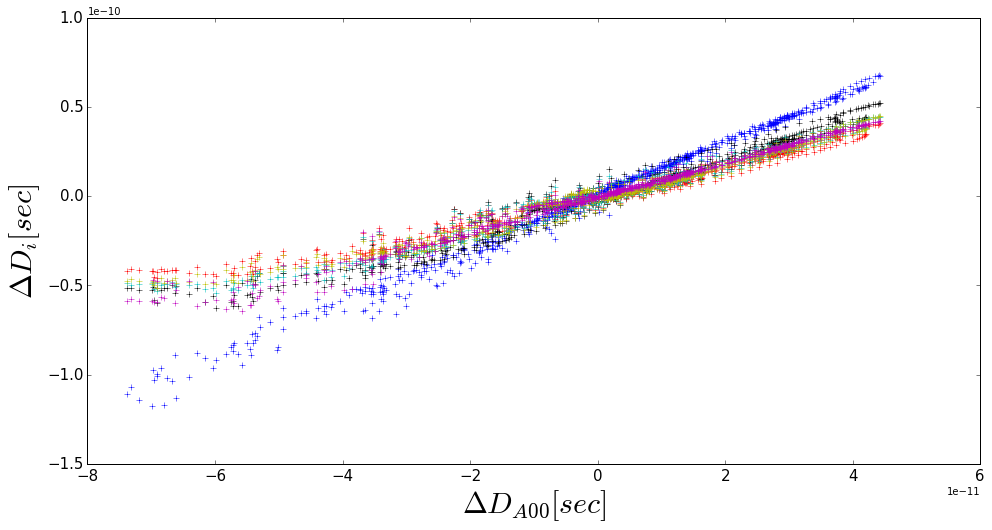

In [40]:
plt.figure(figsize(16,8))
for i in range(len(corr_list)):
    if i!=1:
        plt.plot(del_d[:,1],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
        #plt.legend(fontsize=15)
    #plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel( r'$\Delta D_{A00} [sec]$', size=30)
    plt.ylabel( r'$\Delta D_i [sec]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

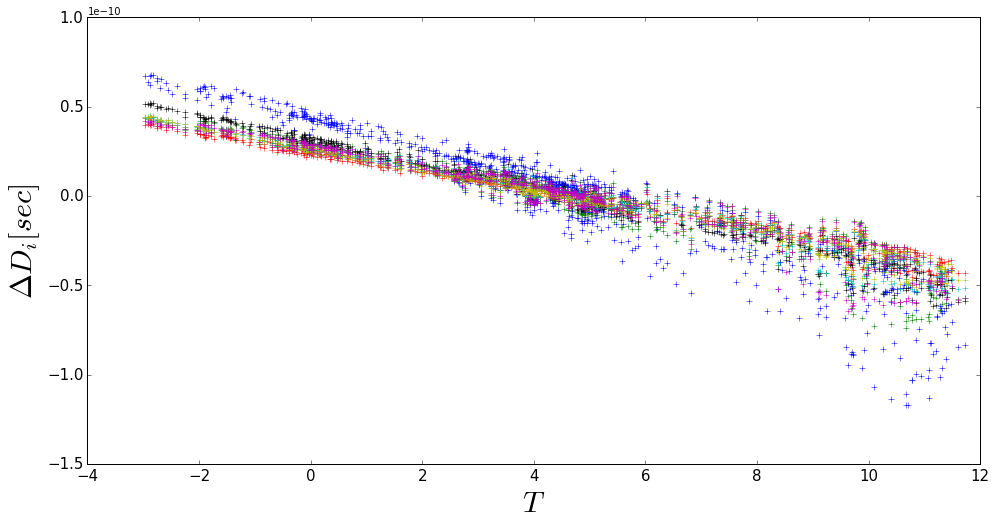

In [42]:

plt.figure(figsize(16,8))
for i in range(len(corr_list)):
    plt.plot(interp_temp_800[0:800],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
    #plt.legend(fontsize=15)
    #plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel( r'$T $', size=30)
    plt.ylabel( r'$\Delta D_i [sec]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

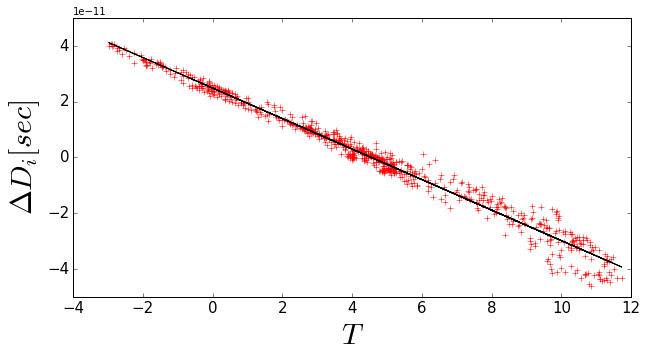

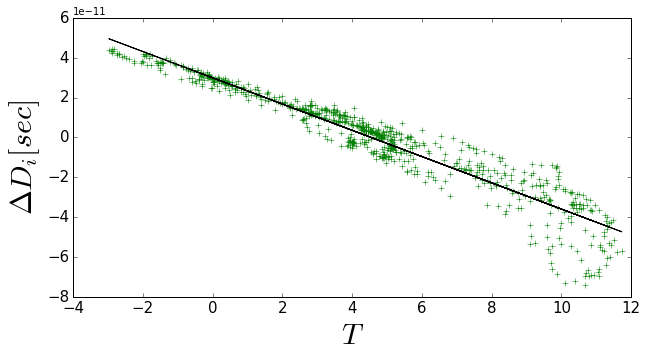

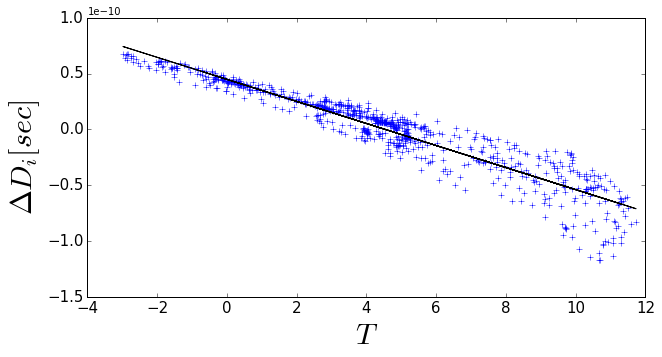

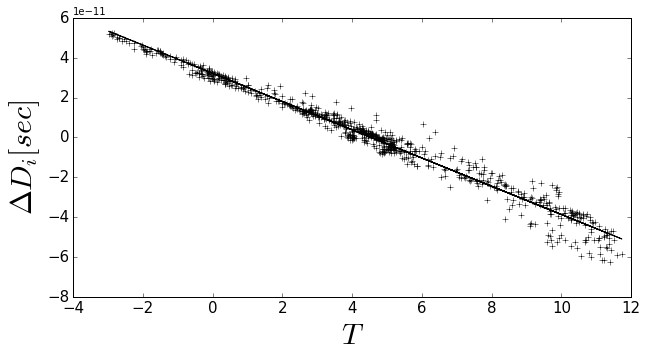

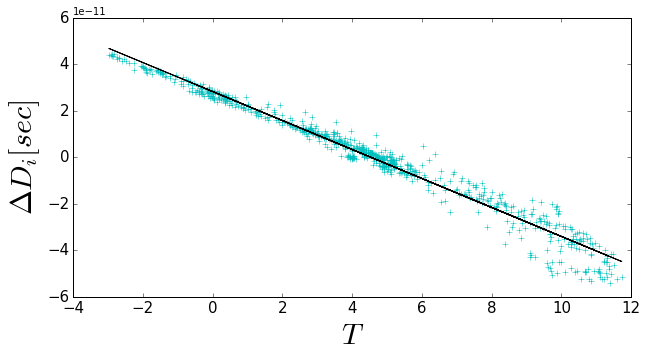

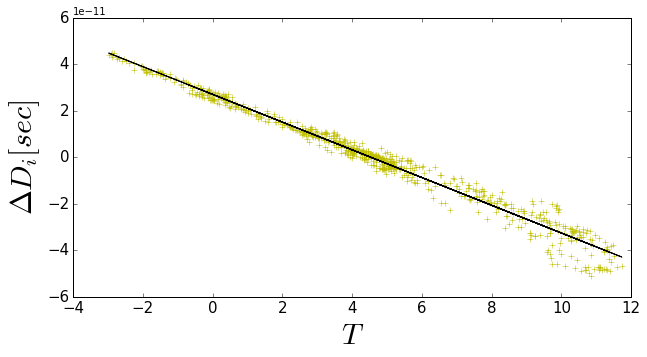

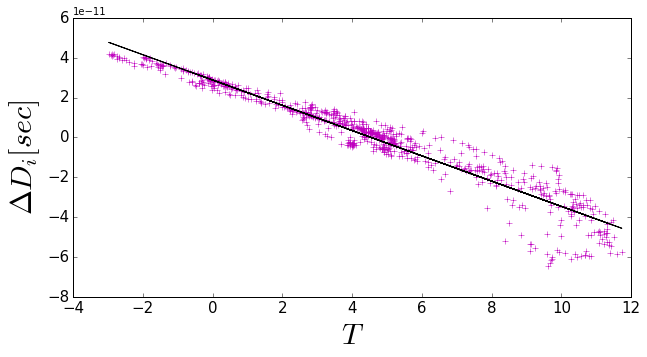

In [43]:
for i in range(len(corr_list)):
    z=np.polyfit(interp_temp_800[0:800], del_d[:,i],1)
    p=np.poly1d(z)
    plt.figure(figsize(10,5))
    plt.plot(interp_temp_800[0:800],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
    plt.plot(interp_temp_800[0:800],p(interp_temp_800[0:800]),'k')
    #plt.legend(fontsize=15)
    #plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel( r'$T $', size=30)
    plt.ylabel( r'$\Delta D_i [sec]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

 
0.7858 x + 5.973e-23
 
1.51 x + 5.747e-23
 
1.019 x - 6.699e-24
 
0.9031 x + 2.594e-24
 
0.8611 x + 2.715e-23
 
0.9471 x + 1.563e-23


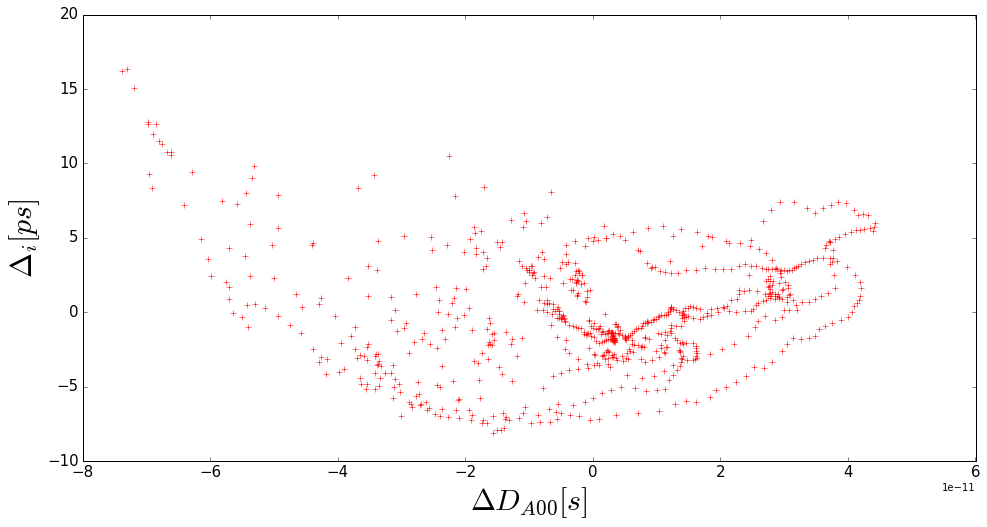

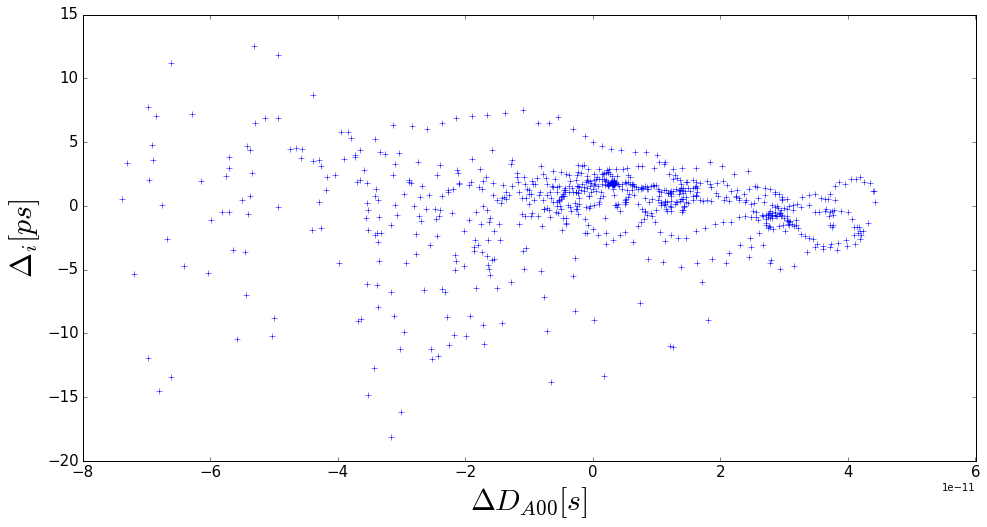

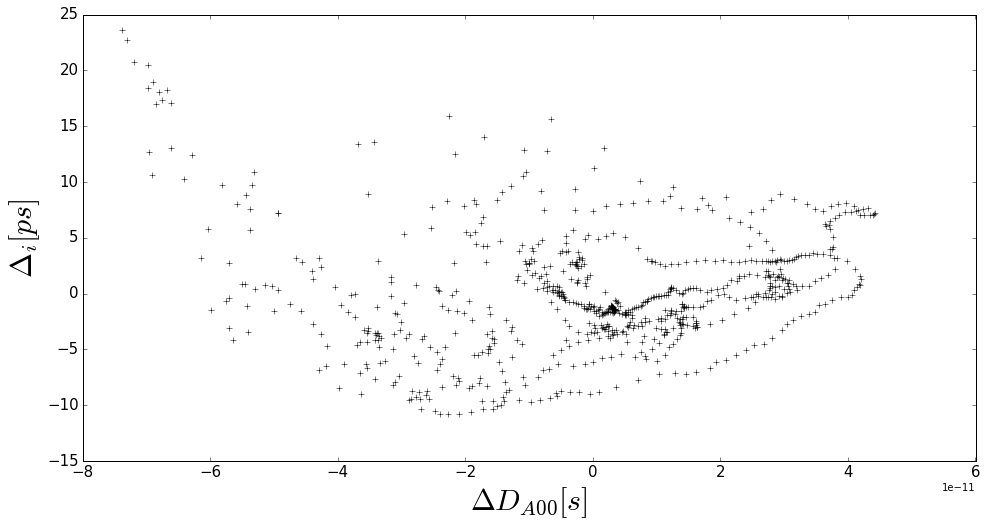

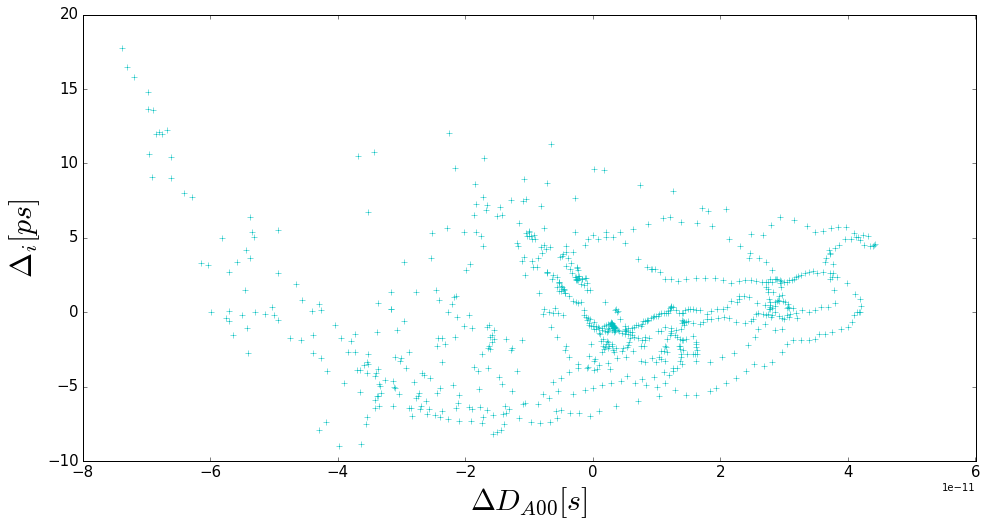

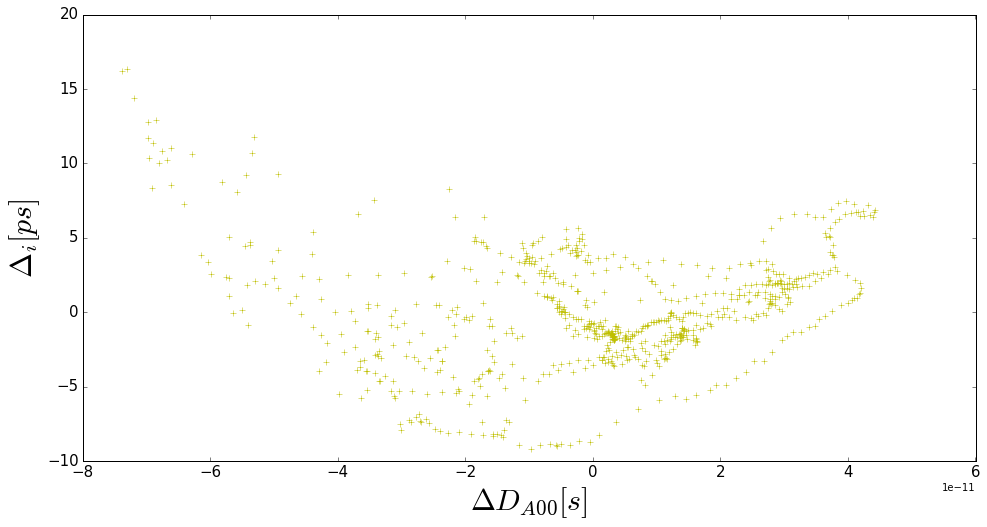

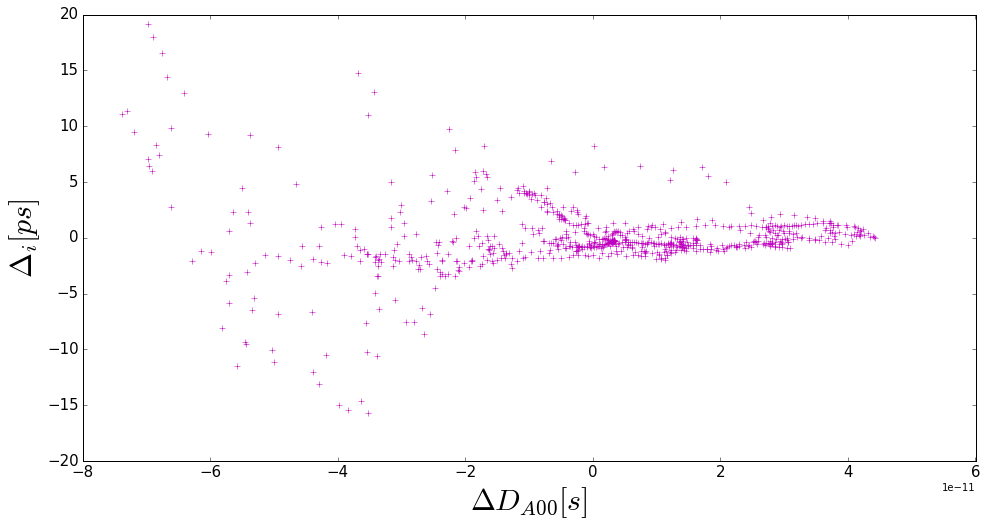

In [44]:
plt.figure(figsize(16,8))
for i in range(len(corr_list)):
    if i!=1:
        
        plt.figure()
        #plt.plot(del_d[:,1],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
        z=np.polyfit(del_d[:,1], del_d[:,i],1)
        p=np.poly1d(z)
        print(p)
        plt.plot(del_d[:,1], (del_d[:,i]-p(del_d[:,1]))/10**-12, '+', color= colors[i])#,label = 'linear fit')
        #plt.plot(del_d[:,1],p(del_d[:,1]),'k')
        #plt.legend(fontsize=15)
    #plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel( r'$\Delta D_{A00} [s]$', size=30)
    plt.ylabel( r'$\Delta_i [ps]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

 
0.7858 x + 5.973e-23
 
1.51 x + 5.747e-23
 
1.019 x - 6.699e-24
 
0.9031 x + 2.594e-24
 
0.8611 x + 2.715e-23
 
0.9471 x + 1.563e-23


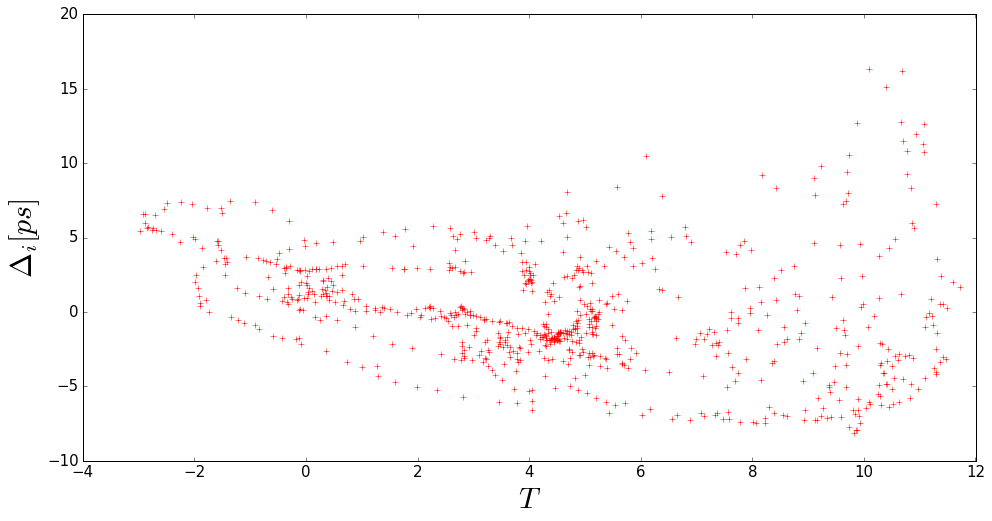

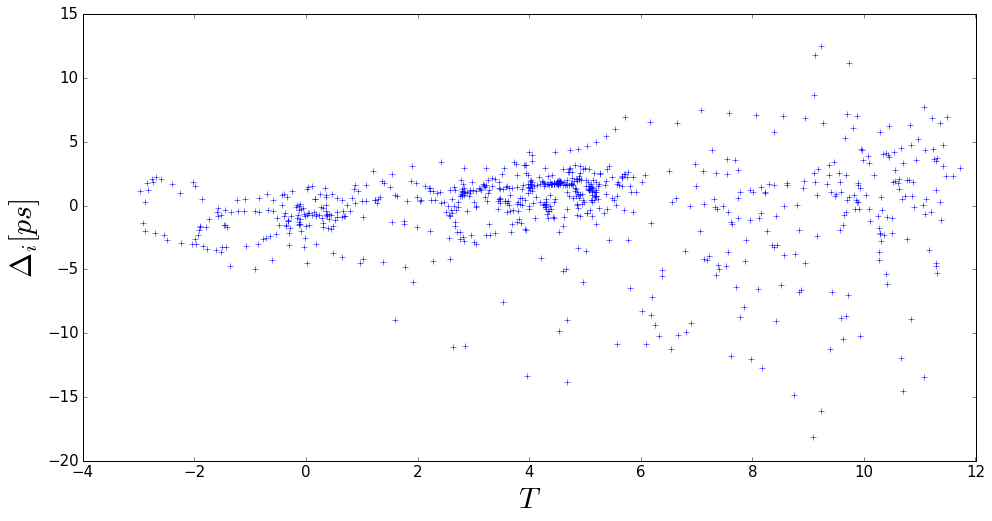

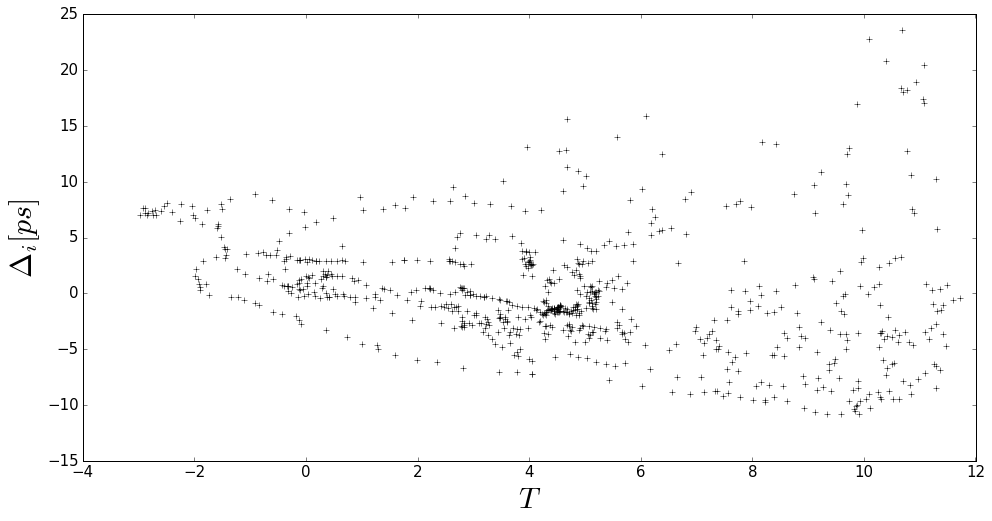

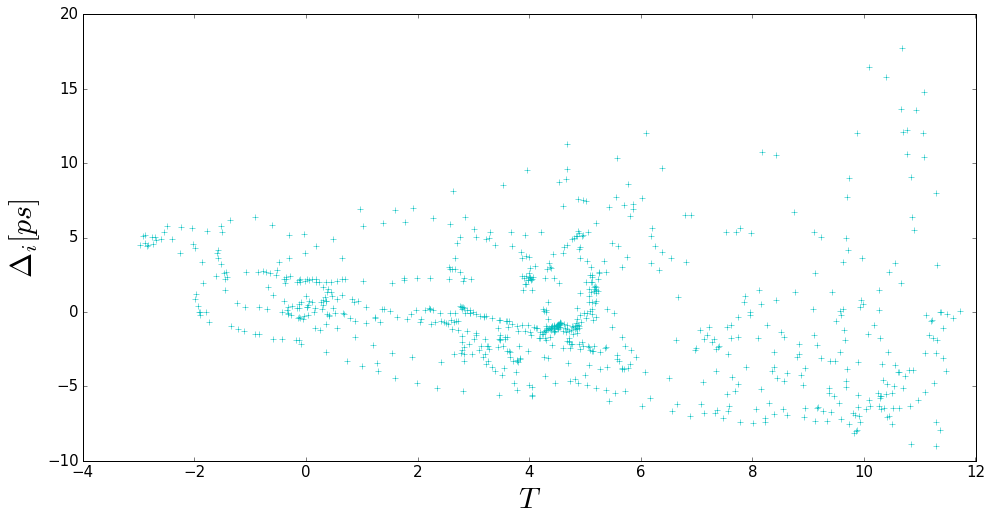

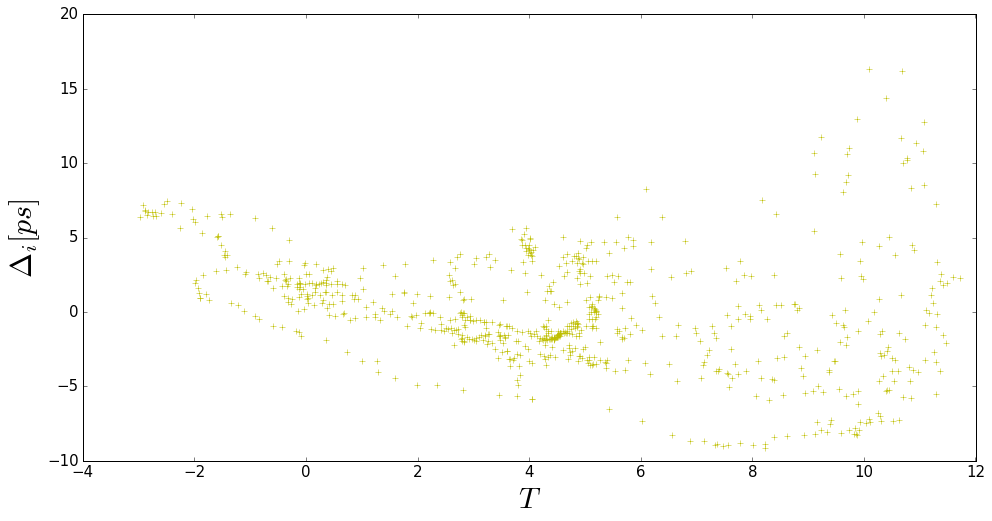

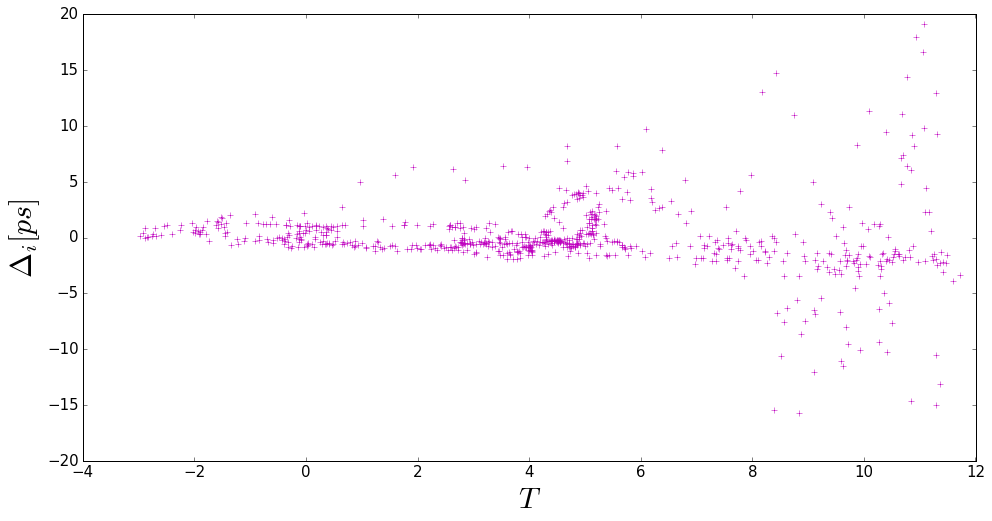

In [45]:
plt.figure(figsize(16,8))
for i in range(len(corr_list)):
    if i!=1:
        
        plt.figure()
        #plt.plot(del_d[:,1],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
        z=np.polyfit(del_d[:,1], del_d[:,i],1)
        p=np.poly1d(z)
        print(p)
        plt.plot(interp_temp_800[0:800], (del_d[:,i]-p(del_d[:,1]))/10**-12, '+', color= colors[i])#,label = 'linear fit')
        #plt.plot(del_d[:,1],p(del_d[:,1]),'k')
        #plt.legend(fontsize=15)
    #plt.ylim(3.915*10**-7,3.925*10**-7)
    plt.xlabel( r'$T $', size=30)
    plt.ylabel( r'$\Delta_i [ps]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

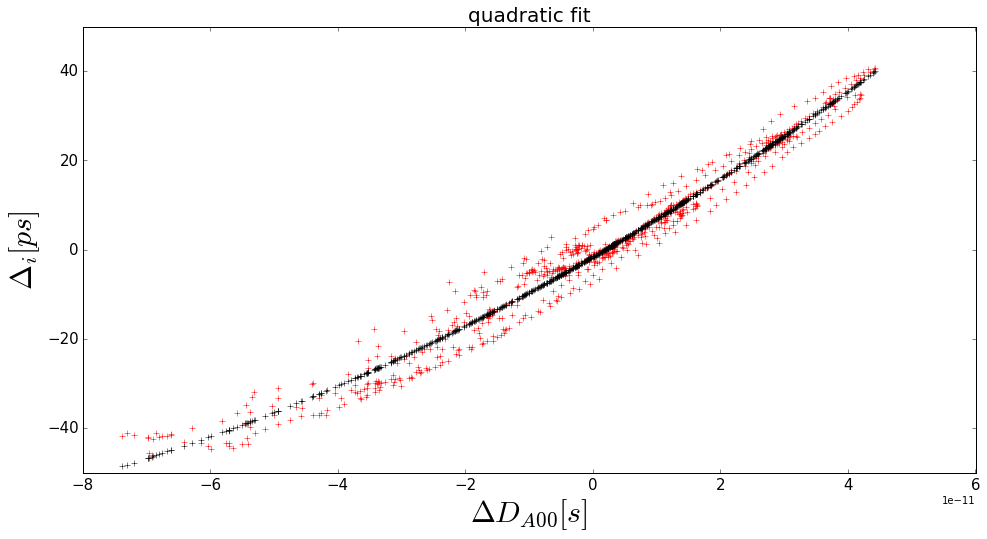

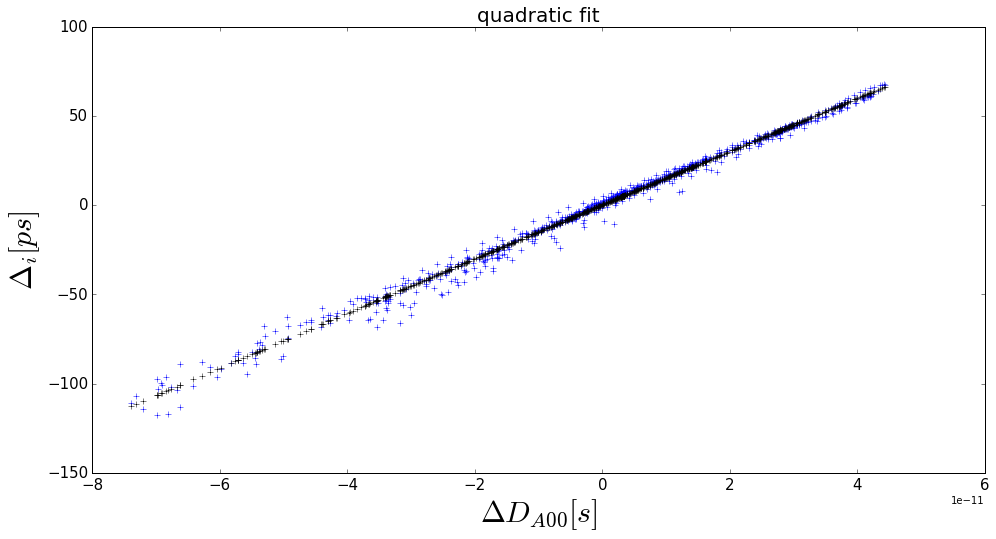

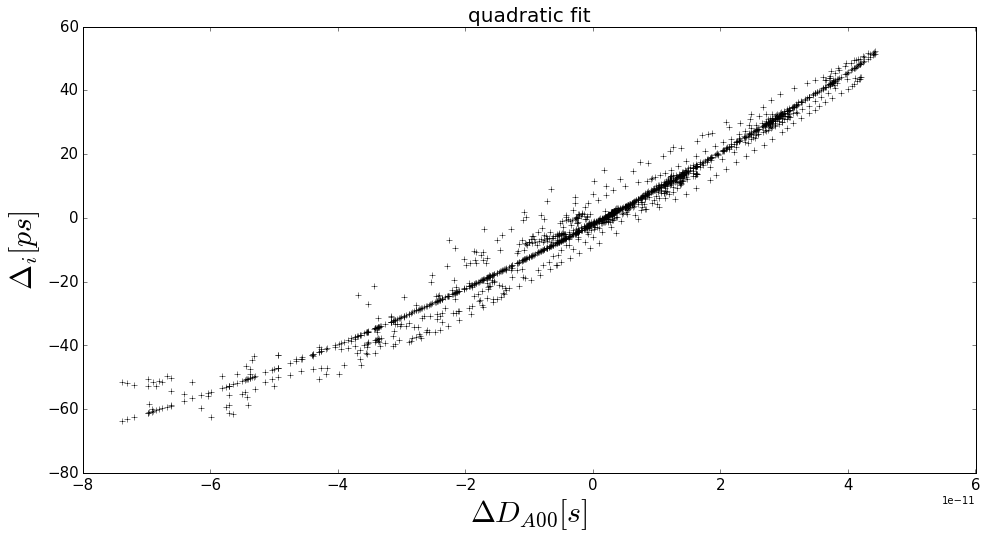

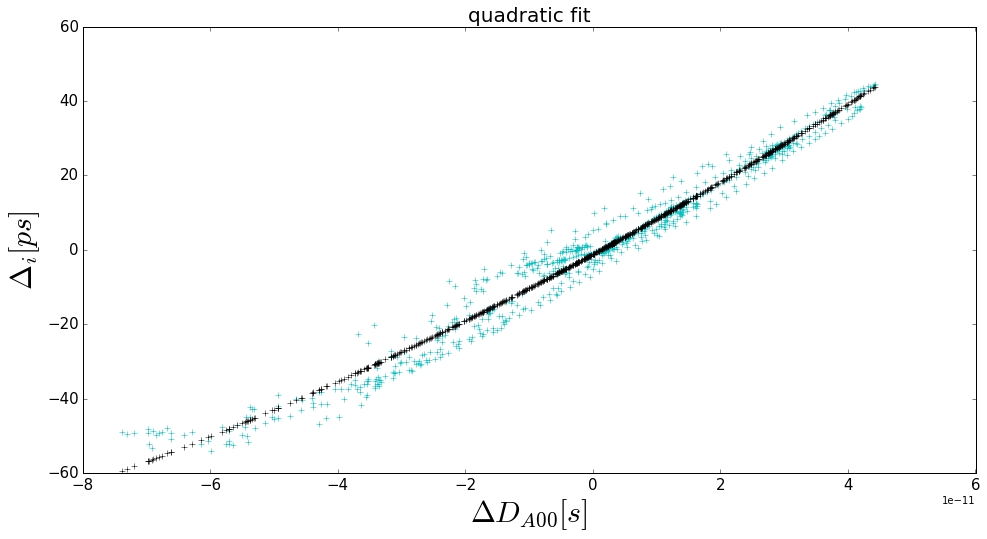

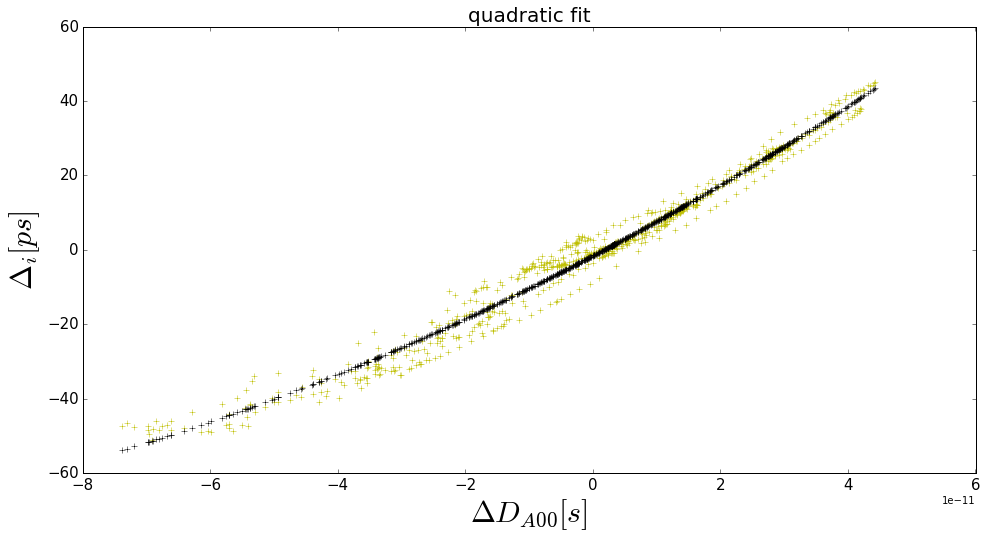

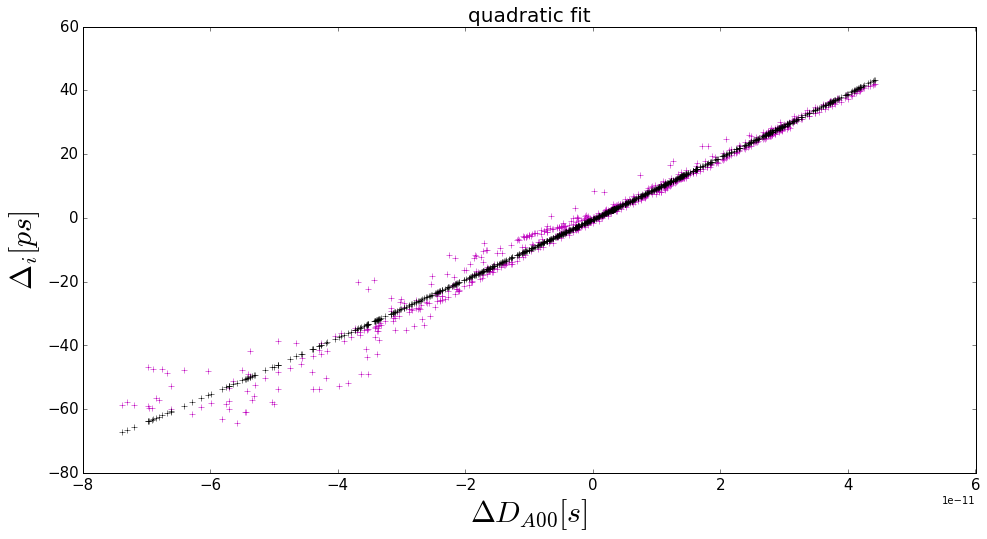

In [46]:
#plt.figure(figsize(10,5))
#plt.title('quadratic fit')
for i in range(len(corr_list)):
    if i!=1:
        
        plt.figure()
        #plt.subplot(6,2,i+1)
        #plt.plot(del_d[:,1],del_d[:,i], '+', color= colors[i], label=legend_crosscorr[i])
        z=np.polyfit(del_d[:,1], del_d[:,i],2)
        p=np.poly1d(z)
        #print(p)
        plt.plot(del_d[:,1], del_d[:,i]/10**-12, '+', color= colors[i])#,label = 'linear fit')
        plt.plot(del_d[:,1], p(del_d[:,1])/10**-12, '+k')#,label = 'linear fit')
    plt.title('quadratic fit', size=20)    
    plt.xlabel( r'$\Delta D_{A00} [s]$', size=30)
    plt.ylabel( r'$\Delta_i [ps]$', size=30)
    plt.yticks( fontsize = 15)
    plt.xticks( fontsize = 15)

In [73]:
colors

['r', 'g', 'b', 'k', 'c', 'y', 'm']

0
1
2
0
1


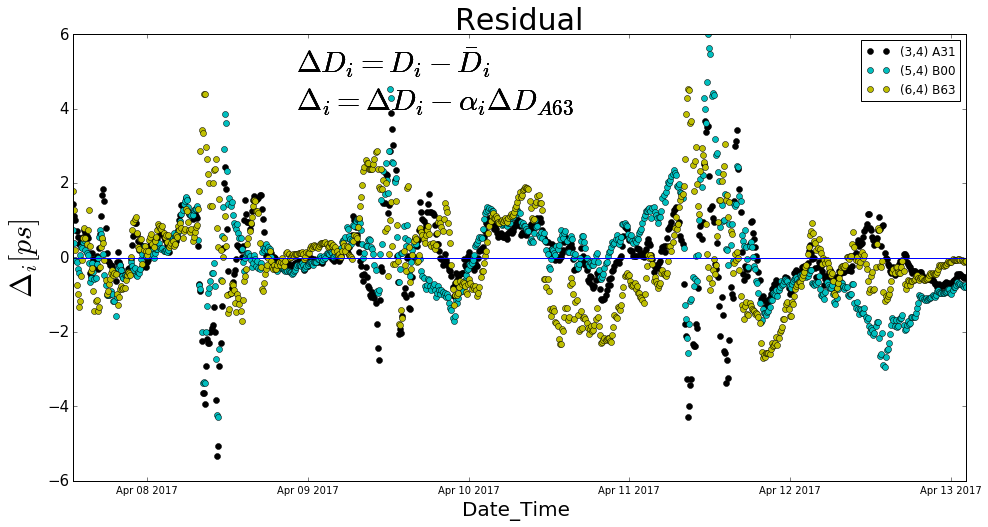

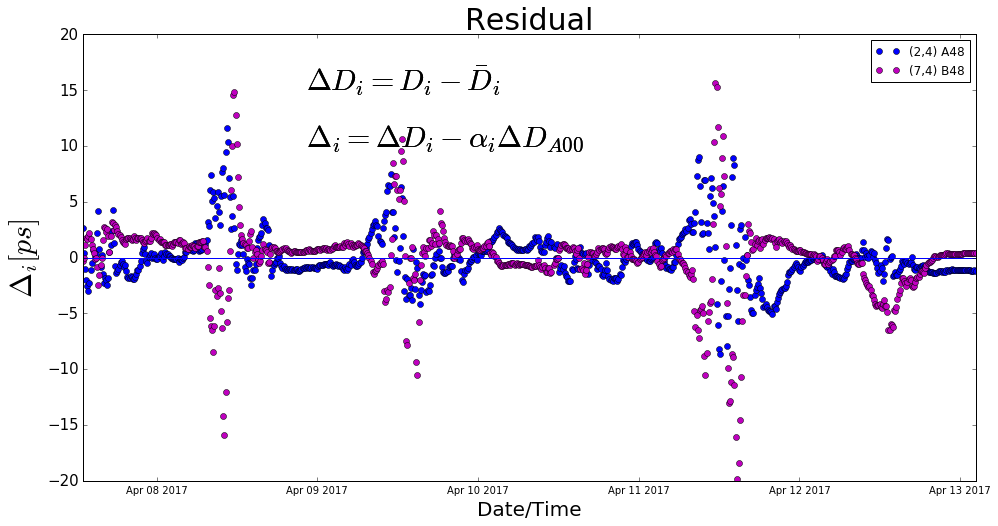

In [43]:
x=numpy.arange(0, 800, 1)
residual1_gp1 = np.zeros((800,3))
residual1_gp2 = np.zeros((800,2))
k=0
list_group=[1,2,6]
for i in range(len(corr_list)):
    if i!=0 and i not in list_group:
        z=np.polyfit(del_d[:,i], del_d[:,0],1)
        p=np.poly1d(z)
        #print (p[0],p[1])
        residual1_gp1[:,k] = del_d[:,0]- p(del_d[:,i])
        k=k+1

k=0
for i in range(len(corr_list)):
    if i!=1 and i in list_group:
        z=np.polyfit(del_d[:,i], del_d[:,1],1)
        p=np.poly1d(z)
        residual1_gp2[:,k] = del_d[:,1]- p(del_d[:,i])
        k=k+1        

plt.figure()
k=0
for i in range(len(corr_list)):
    if i!=0 and i not in list_group:
        print(k)
        plt.plot(date_stamp[0:800],residual1_gp1[:,k]/10**-12,'o', color=colors[i], label=legend_crosscorr[i])
        plt.legend()
        plt.text(date_stamp[200],5, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=30)
        plt.text(date_stamp[200], 4, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{A63} $ ' , fontsize=30)
        plt.ylabel(r'$\Delta_i [ps]$', size=30)
        plt.xlabel('Date_Time ', size=20)
        plt.title('Residual', size=30)
        k=k+1
        #plt.axhline(y=0.6)
        #plt.axhline(y=-0.6)
        plt.yticks( fontsize = 15)
        plt.ylim(-6,6)
        plt.axhline(y=0)


plt.figure()
k=0
for i in range(len(corr_list)):
    if i!=1and i in list_group:
        print(k)
        plt.plot(date_stamp[0:800],residual1_gp2[:,k]/10**-12,'o' ,color=colors[i], label=legend_crosscorr[i])
        plt.legend()
        plt.text(date_stamp[200],15, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=30)
        plt.text(date_stamp[200], 10, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{A00} $ ' , fontsize=30)
        plt.ylabel(r'$\Delta_i [ps]$', size=30)
        plt.xlabel('Date/Time', size=20)
        plt.title('Residual', size=30)
        k=k+1
        #plt.axhline(y=0.6)
        #plt.axhline(y=-0.6)
        plt.yticks( fontsize = 15)
        plt.ylim(-20,20)
        plt.axhline(y=0)


# masking to get night time data

In [49]:
mm=[]
for i in range(800):
    #np.append(mm,interp_time_800[i].hour)
    mm.extend([interp_time_800[i].hour])
mm=np.array(mm)    

In [50]:
time_night=[]
delay_night=[]
temp_night=[]

#delay_night = np.zeros((len(corr_list)))
time_required=[21,22,23,0,1,2,3,4,5]

for k in range(7):
    delay_night_day=[]
    for i in range(800):
        if interp_time_800[i].hour in time_required:
            delay_night_day.append(delay[i,k])
            if k==0:
                time_night.append(interp_time_800[i])
                temp_night.append(interp_temp_800[i])
    delay_night.append(delay_night_day)
#for i in range(7):
#plt.plot(time_night, delay_night[i])


302


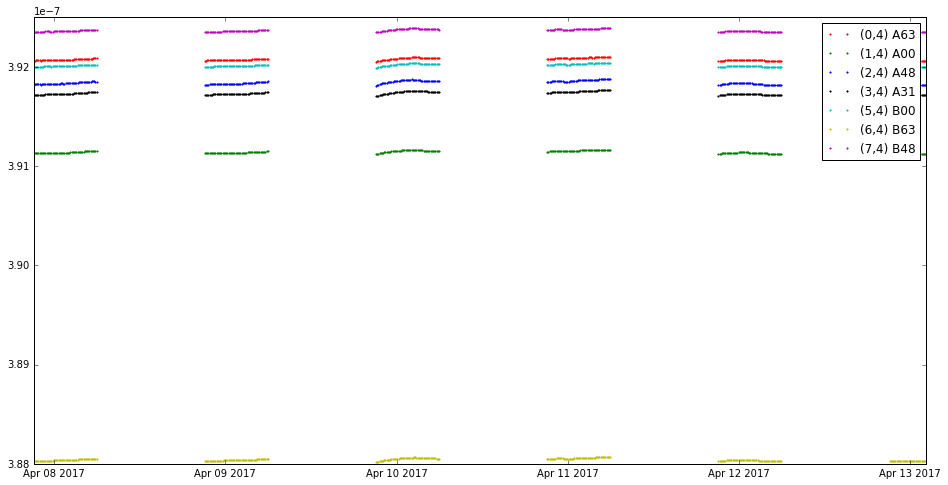

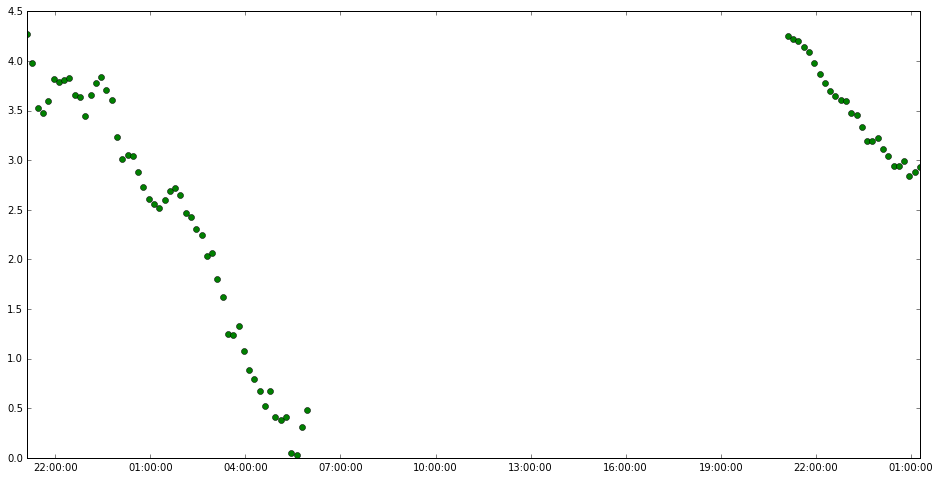

In [51]:
for i in range(len(corr_list)):
    plt.plot(time_night,delay_night[i],'.', color = colors[i], label = legend_crosscorr[i], markersize = 3)
    plt.legend()

plt.figure()
plt.plot(time_night[0:80],temp_night[0:80],'og',linewidth =4)

print (len(time_night))

0 g
0 b
0 k
0 c
0 y
0 m
1 r
1 b
1 k
1 c
1 y
1 m
2 r
2 g
2 k
2 c
2 y
2 m
3 r
3 g
3 b
3 c
3 y
3 m
4 r
4 g
4 b
4 k
4 y
4 m
5 r
5 g
5 b
5 k
5 c
5 m
6 r
6 g
6 b
6 k
6 c
6 y


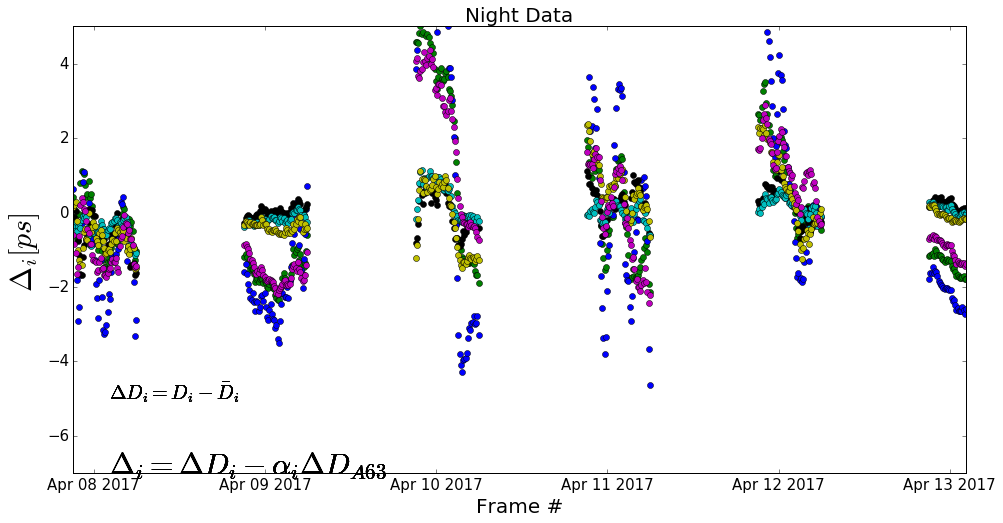

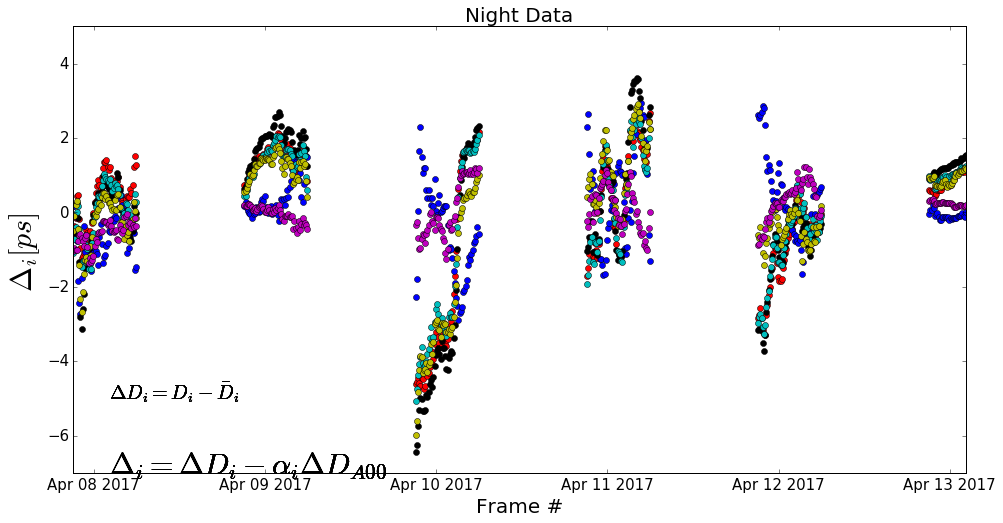

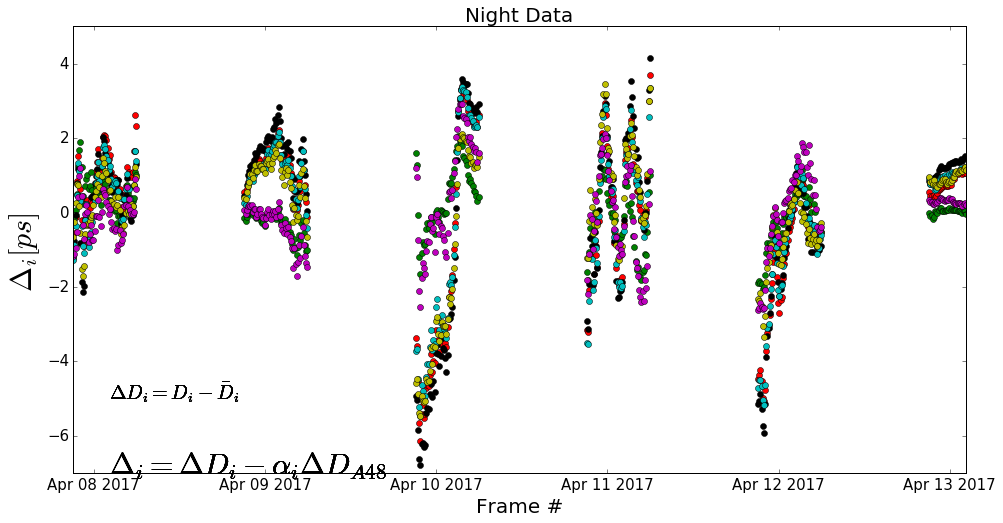

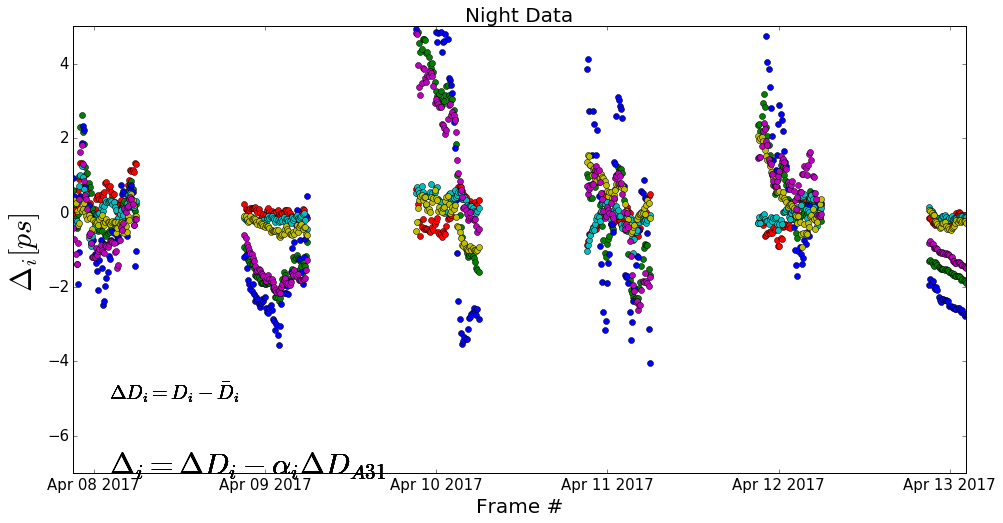

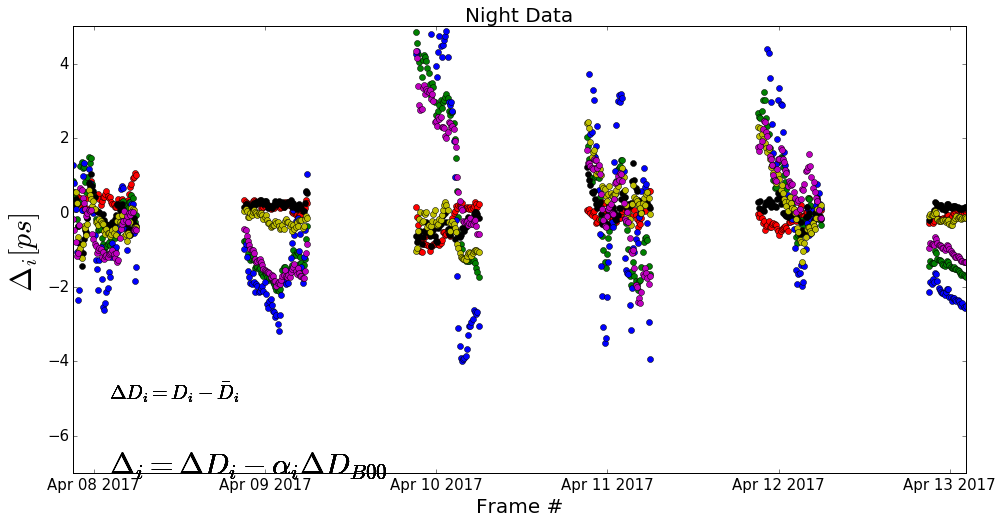

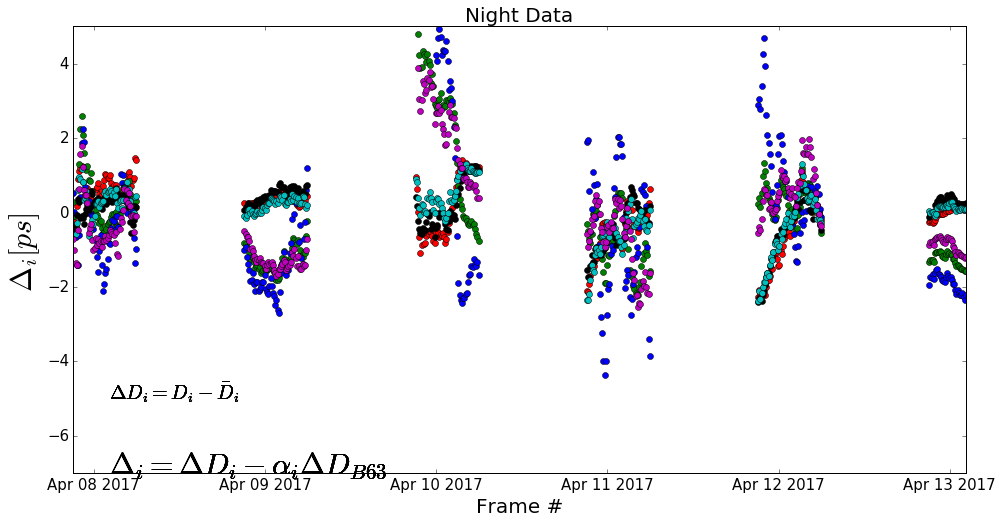

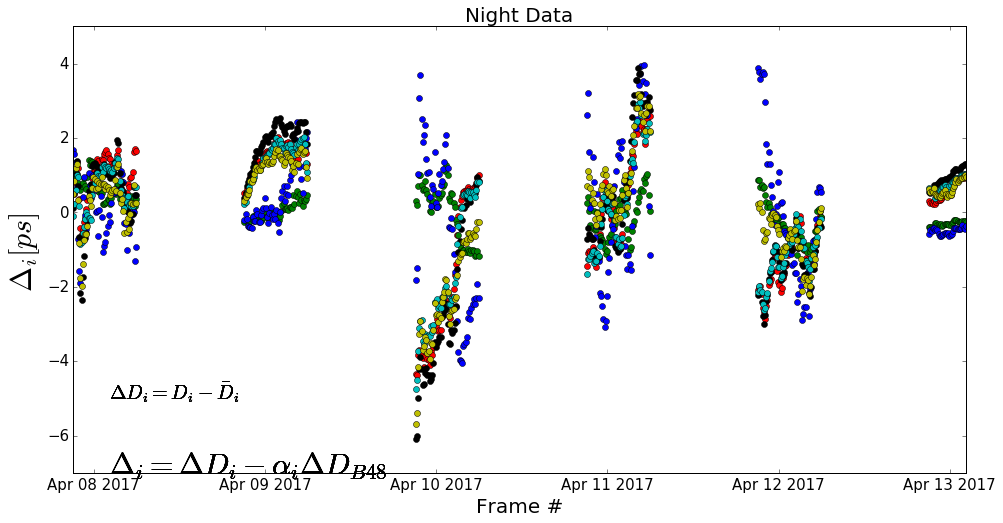

In [52]:
del_d_night = np.zeros((302,len(corr_list)))
for i in range(7):
    del_d_night[:,i] = (delay_night[i]-np.mean(delay_night[i]))    

legend_all = ["A63","A00","A48","A31","B00","B63","B48"]
# k is for refernce
for k in range(len(legend_all)):
    residual_all_night = np.zeros((302,len(corr_list)-1))
    kkk=0
    
    for i in range(len(corr_list)):
        if i!=k:
            z=np.polyfit(del_d_night[:,k], del_d_night[:,i],2)
            p=np.poly1d(z)
            residual_all_night[:,kkk] = del_d_night[:,i]- p(del_d_night[:,k])
            kkk=kkk+1
            
    plt.figure()
    kk=0
    
    for i in range(len(corr_list)):
        if i!=k:
            print(k,colors[i])
            plt.plot(time_night,residual_all_night[:,kk]/10**-12,'o', color=colors[i], label=legend_crosscorr[i])
            plt.text(time_night[30], -5, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
            plt.text(time_night[30], -7, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{%s} $ '%(str(legend_all[k])) , fontsize=30)
            plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
            plt.xlabel('Frame #', size=20)
            plt.title('Night Data', size=20)
            kk=kk+1
            plt.yticks( fontsize = 15)
            plt.xticks( fontsize = 15)
        #plt.plot(time_night,temp_night,'og',linewidth =4)
    plt.ylim(-7,5)
             

3 0
3 4
3 5
3.41154624785e-15
7.02896166584e-15
3.54094972622e-15
6 1
-4.9408600831e-16


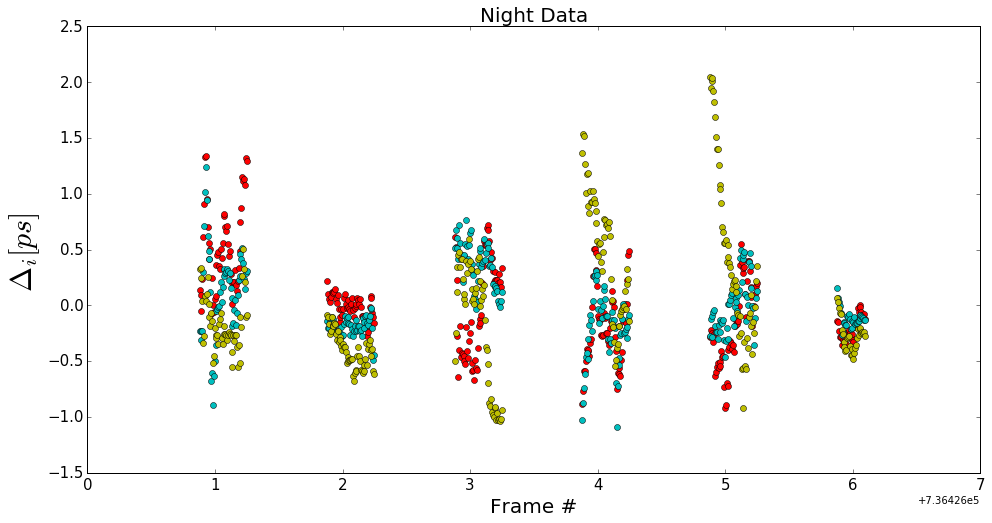

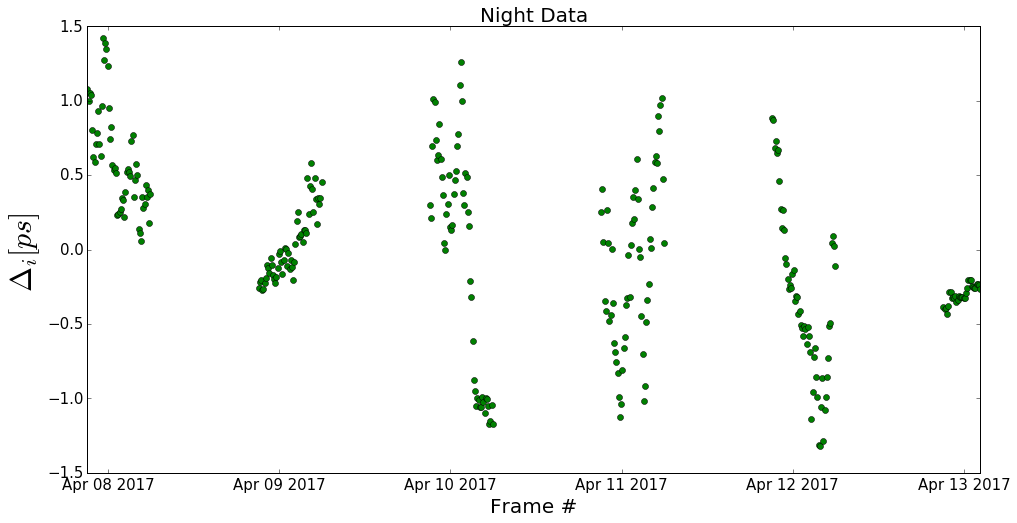

In [84]:
del_d_night = np.zeros((302,len(corr_list)))

for i in range(7):
    del_d_night[:,i] = (delay_night[i]-np.mean(delay_night[i]))    

legend_all = ["A63","A00","A48","A31","B00","B63","B48"]

# k is for refernce
for k in range(len(legend_all)):
    residual_all_night_gp1 = np.zeros((302,3))
    residual_all_night_gp2 = np.zeros((302,1))
    kkk=0
    
    for i in range(len(corr_list)):
        if i!=k and i!=1 and i!=2 and i!=6 and k==3:
            print(k,i)
            z=np.polyfit(del_d_night[:,k], del_d_night[:,i],2)
            p=np.poly1d(z)
            residual_all_night_gp1[:,kkk] = del_d_night[:,i]- p(del_d_night[:,k])
            kkk=kkk+1
        if i!=k and i!=0 and i!=2 and i!=3 and i!=4 and i!=5 and k==6:
            print(k,i)
            z=np.polyfit(del_d_night[:,k], del_d_night[:,i],2)
            p=np.poly1d(z)
            residual_all_night_gp2[:,kkk] = del_d_night[:,i]- p(del_d_night[:,k])
            kkk=kkk+1
            
    kk=0
    
    for i in range(len(corr_list)):
        if i!=k and i!=1 and i!=2 and i!=6 and k==3:
            plt.figure(1)
            plt.plot(time_night,residual_all_night_gp1[:,kk]/10**-12,'o', color=colors[i], label=legend_crosscorr[i])
            print(np.mean(residual_all_night_gp1[:,kk]/10**-12))
            #plt.text(time_night[30], -5, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
            #plt.text(time_night[30], -7, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{%s} $ '%(str(legend_all[k])) , fontsize=20)
            plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
            plt.xlabel('Frame #', size=20)
            plt.title('Night Data', size=20)
            kk=kk+1
            plt.yticks( fontsize = 15)
            plt.xticks( fontsize = 15)
        #plt.plot(time_night,temp_night,'og',linewidth =4)
        
        if i!=k and i!=0 and i!=2 and i!=3 and i!=4 and i!=5 and k==6:
            plt.figure(2)
            plt.plot(time_night,residual_all_night_gp2[:,kk]/10**-12,'o', color=colors[i], label=legend_crosscorr[i])
            print(np.mean(residual_all_night_gp2[:,kk]/10**-12))
            #plt.text(time_night[30], -5, r'$\Delta D_i =  D_i - \bar D_i $ ' , fontsize=20)
            #plt.text(time_night[30], -7, r'$\Delta_i = \Delta D_i - \alpha_i \Delta D_{%s} $ '%(str(legend_all[k])) , fontsize=20)
            plt.ylabel(r'$\Delta_i [ps]$ ', size=30)
            plt.xlabel('Frame #', size=20)
            plt.title('Night Data', size=20)
            kk=kk+1
            plt.yticks( fontsize = 15)
            plt.xticks( fontsize = 15)
        #plt.plot(time_night,temp_night,'og',linewidth =4)
    #plt.ylim(-2,2)
    plt.axhline(y=-0.6, xmin=time_night[0], xmax = time_night[301])
    plt.axhline(y=0.6, xmin=time_night[0], xmax = time_night[301])

In [54]:
np.mean(residual_all_night_gp2[:,0])

-5.1356412203209502e-28

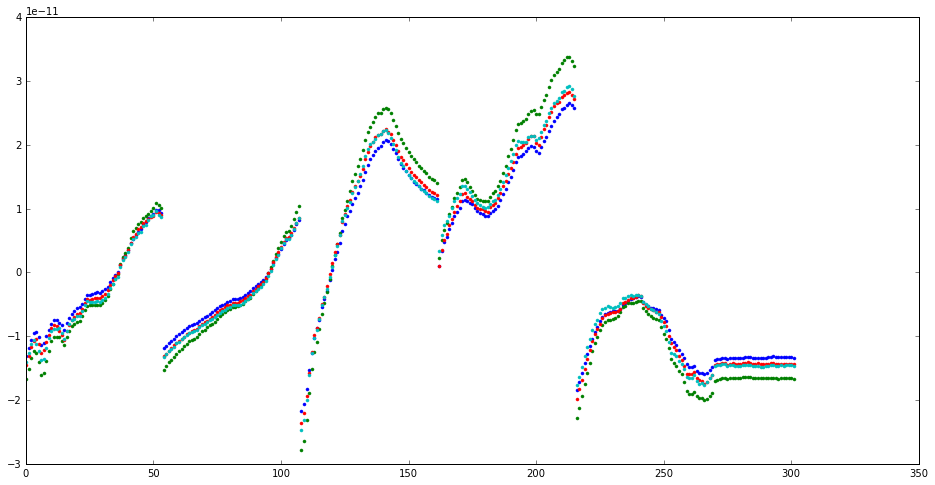

In [55]:
plt.plot(del_d_night[:,0],'.')
plt.plot(del_d_night[:,3],'.')
plt.plot(del_d_night[:,4],'.')
plt.plot(del_d_night[:,5],'.')

In [56]:
avg_delay= np.mean(del_d, axis=1)
residual_avg_del = np.zeros((800,7))
corr_matrix=np.zeros((7,7))
for i in range(len(corr_list)):
    
    z=np.polyfit(del_d[:,i], avg_delay,1)
    p=np.poly1d(z)
    residual_avg_del[:,i] = avg_delay - p(del_d[:,i])

for i in range(len(corr_list)):
    for j in range(len(corr_list)):
        corr_matrix[i,j]=(np.corrcoef(residual_avg_del[:,i],residual_avg_del[:,j]))[0][1]

print (np.abs(corr_matrix))

[[ 1.          0.77740784  0.8355496   0.8872395   0.82146312  0.81995787
   0.39648416]
 [ 0.77740784  1.          0.79563133  0.83429521  0.81619828  0.73445196
   0.1121767 ]
 [ 0.8355496   0.79563133  1.          0.90482383  0.90857785  0.58370908
   0.01864808]
 [ 0.8872395   0.83429521  0.90482383  1.          0.88386554  0.6834583
   0.14650716]
 [ 0.82146312  0.81619828  0.90857785  0.88386554  1.          0.56652697
   0.01665776]
 [ 0.81995787  0.73445196  0.58370908  0.6834583   0.56652697  1.          0.582414  ]
 [ 0.39648416  0.1121767   0.01864808  0.14650716  0.01665776  0.582414    1.        ]]


In [57]:
np.mean(residual_avg_del[:,i]*residual_avg_del[:,j])

6.1698168865508228e-24

In [58]:
(np.corrcoef(residual_avg_del[:,i],residual_avg_del[:,6]))[0][1]

1.0

In [59]:
print (colors)

['r', 'g', 'b', 'k', 'c', 'y', 'm']


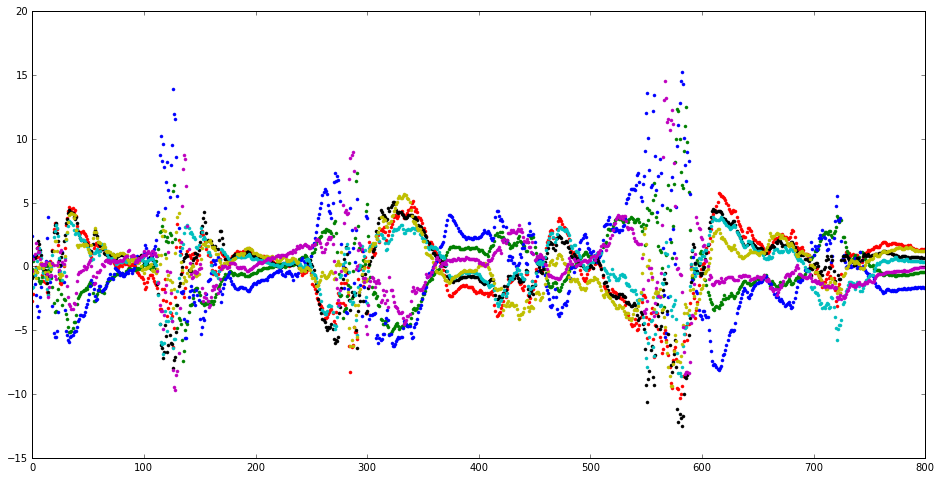

In [60]:
for i in range(len(corr_list)):
    plt.plot(residual_avg_del[:,i]/10**-12,'.', color=colors[i])

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

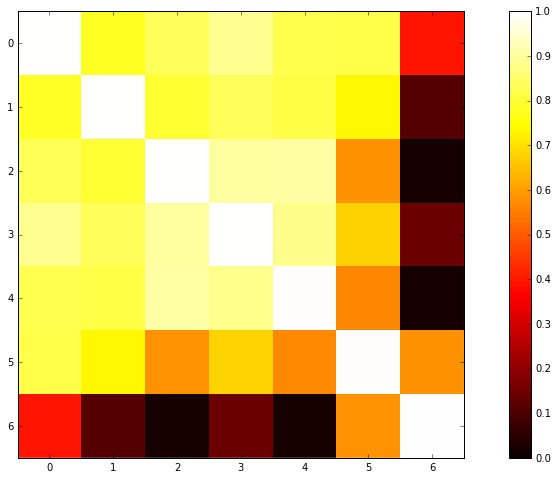

In [61]:
plt.imshow(np.abs(corr_matrix), cmap=plt.get_cmap('hot'), interpolation='none',
               vmin=0, vmax=1)
plt.colorbar()
plt.set_xticks(np.arange(len(colors)))

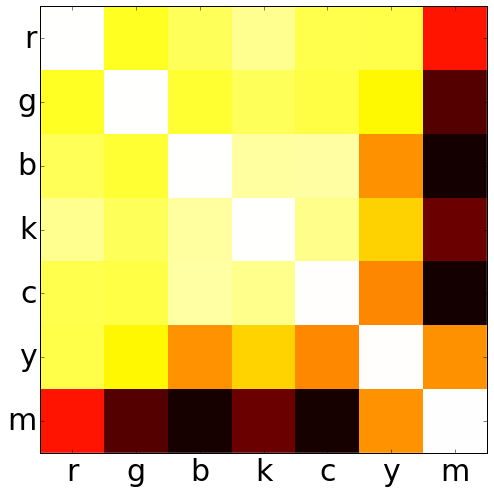

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(np.abs(corr_matrix), cmap=plt.get_cmap('hot'), interpolation='none',
               vmin=0, vmax=1)

ax.set_xticks(np.arange(len(colors)))
ax.set_yticks(np.arange(len(colors)))

ax.set_xticklabels(colors, size=30)
ax.set_yticklabels(colors, size=30)

#ax.colorbar()